In [1]:
# Importing necessary libraries for data analysis and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Data Analysis and Preprocessing**
### **Train Data**

In [2]:
# Loading Train Data
trainData=pd.read_csv("/content/trainData.csv")
trainData.head()

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,NaN,NaN,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,NaN,NaN,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,NaN,NaN,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,NaN,NaN,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0


In [3]:
# Checking for null values
trainData.isnull().sum().sort_values(ascending=False)

id                            226067
member_id                     226067
mths_since_last_delinq        115840
emp_length                     14611
tot_cur_bal                     7107
tot_coll_amt                    7107
total_rev_hi_lim                7107
revol_util                       190
dti                              180
collections_12_mths_ex_med        16
delinq_2yrs                        5
inq_last_6mths                     5
open_acc                           5
pub_rec                            5
acc_now_delinq                     5
total_acc                          5
home_ownership                     0
recoveries                         0
loan_amnt                          0
int_rate                           0
application_type                   0
last_pymnt_amnt                    0
collection_recovery_fee            0
total_pymnt_inv                    0
total_rec_late_fee                 0
total_rec_int                      0
total_rec_prncp                    0
a

In [4]:
# droping features having more than 50% missing values

trainData.drop(labels=['id','member_id','mths_since_last_delinq'], axis=1, inplace=True)

In [5]:
trainData.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,12.92,0.0,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,0.0,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,1.0,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,1.0,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0


In [6]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   226067 non-null  int64  
 1   int_rate                    226067 non-null  float64
 2   installment                 226067 non-null  float64
 3   grade                       226067 non-null  object 
 4   emp_length                  211456 non-null  object 
 5   home_ownership              226067 non-null  object 
 6   annual_inc                  226067 non-null  float64
 7   loan_status                 226067 non-null  object 
 8   dti                         225887 non-null  float64
 9   delinq_2yrs                 226062 non-null  float64
 10  inq_last_6mths              226062 non-null  float64
 11  open_acc                    226062 non-null  float64
 12  pub_rec                     226062 non-null  float64
 13  revol_bal     

In [7]:
# Creating a target variable "y"
trainData['y'] = trainData['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
trainData['y']

0         0
1         0
2         0
3         0
4         0
         ..
226062    0
226063    0
226064    0
226065    0
226066    0
Name: y, Length: 226067, dtype: int64

In [8]:
trainData.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y
0,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,12.92,0.0,...,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0,0
1,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,...,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0,0
2,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,0.0,...,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0,0
3,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,1.0,...,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0,0
4,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,1.0,...,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0,0


In [9]:
trainData.drop(labels=['loan_status'], axis=1, inplace=True)

In [11]:
# List of columns with missing values
null_cols = ['emp_length', 'total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt',
             'revol_util', 'dti','collections_12_mths_ex_med','acc_now_delinq','total_acc','total_pymnt','application_type',
             'collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp',
             'revol_bal','total_pymnt_inv','last_pymnt_amnt','delinq_2yrs','inq_last_6mths','open_acc','pub_rec',
             'home_ownership','annual_inc']

# Imputation loop
for col in null_cols:
    if trainData[col].dtype == 'object':
        # Imputing categorical variables with mode
        mode_value = trainData[col].mode()[0]
        trainData[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")
    else:
        # Imputing numerical variables with mean for non-binary, and mode for binary
        median_value = trainData[col].median()
        trainData[col].fillna(median_value, inplace=True)
        print(f"Imputed {col} with median: {median_value}")

Imputed emp_length with mode: 10+ years
Imputed total_rev_hi_lim with median: 25400.0
Imputed tot_cur_bal with median: 79638.5
Imputed tot_coll_amt with median: 0.0
Imputed revol_util with median: 50.3
Imputed dti with median: 17.84
Imputed collections_12_mths_ex_med with median: 0.0
Imputed acc_now_delinq with median: 0.0
Imputed total_acc with median: 22.0
Imputed total_pymnt with median: 9077.7
Imputed application_type with mode: Individual
Imputed collection_recovery_fee with median: 0.0
Imputed recoveries with median: 0.0
Imputed total_rec_late_fee with median: 0.0
Imputed total_rec_int with median: 1480.16
Imputed total_rec_prncp with median: 6842.58
Imputed revol_bal with median: 11345.0
Imputed total_pymnt_inv with median: 9061.47
Imputed last_pymnt_amnt with median: 587.92
Imputed delinq_2yrs with median: 0.0
Imputed inq_last_6mths with median: 0.0
Imputed open_acc with median: 11.0
Imputed pub_rec with median: 0.0
Imputed home_ownership with mode: MORTGAGE
Imputed annual_inc 

In [12]:
trainData.isnull().sum().sort_values(ascending=False)

loan_amnt                     0
int_rate                      0
total_rev_hi_lim              0
tot_cur_bal                   0
tot_coll_amt                  0
acc_now_delinq                0
application_type              0
collections_12_mths_ex_med    0
last_pymnt_amnt               0
collection_recovery_fee       0
recoveries                    0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
total_pymnt                   0
total_acc                     0
revol_util                    0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
delinq_2yrs                   0
dti                           0
annual_inc                    0
home_ownership                0
emp_length                    0
grade                         0
installment                   0
y                             0
dtype: int64

### **Applying same preprocessig method on Test Data**

In [14]:
# Loading Test Data
testData=pd.read_csv("/content/testData.csv")
testData.head()

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,8000,7.07,247.28,A,10+ years,MORTGAGE,78000.0,Fully Paid,...,0.0,0.0,0.0,6844.48,0.0,Individual,0.0,0.0,200412.0,16800.0
1,NaN,NaN,20000,7.21,619.47,A,3 years,RENT,78000.0,Current,...,0.0,0.0,0.0,619.47,0.0,Individual,0.0,0.0,39187.0,42100.0
2,NaN,NaN,20000,12.74,452.41,C,5 years,MORTGAGE,97000.0,Current,...,0.0,0.0,0.0,452.41,0.0,Individual,0.0,0.0,279688.0,6500.0
3,NaN,NaN,20000,8.81,634.23,A,10+ years,MORTGAGE,115000.0,Fully Paid,...,0.0,0.0,0.0,20015.91,0.0,Individual,0.0,0.0,172493.0,40200.0
4,NaN,NaN,20000,15.31,479.06,C,10+ years,OWN,75000.0,Fully Paid,...,0.0,0.0,0.0,478.99,0.0,Individual,0.0,NaN,NaN,NaN


In [15]:
# Checking for null values
testData.isnull().sum().sort_values(ascending=False)

id                            226067
member_id                     226067
mths_since_last_delinq        115999
emp_length                     14799
tot_cur_bal                     7027
tot_coll_amt                    7027
total_rev_hi_lim                7027
dti                              174
revol_util                       159
collections_12_mths_ex_med        22
inq_last_6mths                     6
pub_rec                            5
delinq_2yrs                        5
open_acc                           5
acc_now_delinq                     5
total_acc                          5
annual_inc                         1
application_type                   0
last_pymnt_amnt                    0
home_ownership                     0
recoveries                         0
int_rate                           0
loan_amnt                          0
collection_recovery_fee            0
total_pymnt_inv                    0
total_rec_late_fee                 0
total_rec_int                      0
t

In [16]:
# droping features having more than 50% missing values

testData.drop(labels=['id','member_id','mths_since_last_delinq'], axis=1, inplace=True)

In [17]:
testData.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,8000,7.07,247.28,A,10+ years,MORTGAGE,78000.0,Fully Paid,19.25,0.0,...,0.0,0.0,0.0,6844.48,0.0,Individual,0.0,0.0,200412.0,16800.0
1,20000,7.21,619.47,A,3 years,RENT,78000.0,Current,23.06,0.0,...,0.0,0.0,0.0,619.47,0.0,Individual,0.0,0.0,39187.0,42100.0
2,20000,12.74,452.41,C,5 years,MORTGAGE,97000.0,Current,5.52,1.0,...,0.0,0.0,0.0,452.41,0.0,Individual,0.0,0.0,279688.0,6500.0
3,20000,8.81,634.23,A,10+ years,MORTGAGE,115000.0,Fully Paid,16.84,0.0,...,0.0,0.0,0.0,20015.91,0.0,Individual,0.0,0.0,172493.0,40200.0
4,20000,15.31,479.06,C,10+ years,OWN,75000.0,Fully Paid,7.95,0.0,...,0.0,0.0,0.0,478.99,0.0,Individual,0.0,NaN,NaN,NaN


In [18]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   226067 non-null  int64  
 1   int_rate                    226067 non-null  float64
 2   installment                 226067 non-null  float64
 3   grade                       226067 non-null  object 
 4   emp_length                  211268 non-null  object 
 5   home_ownership              226067 non-null  object 
 6   annual_inc                  226066 non-null  float64
 7   loan_status                 226067 non-null  object 
 8   dti                         225893 non-null  float64
 9   delinq_2yrs                 226062 non-null  float64
 10  inq_last_6mths              226061 non-null  float64
 11  open_acc                    226062 non-null  float64
 12  pub_rec                     226062 non-null  float64
 13  revol_bal     

In [19]:
# Creating a target variable "y"
testData['y'] = testData['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
testData['y']

0         0
1         0
2         0
3         0
4         0
         ..
226062    0
226063    0
226064    0
226065    0
226066    0
Name: y, Length: 226067, dtype: int64

In [20]:
testData.drop(labels=['loan_status'], axis=1, inplace=True)

In [21]:
# List of columns with missing values
null_cols = ['emp_length', 'total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt',
             'revol_util', 'dti','collections_12_mths_ex_med','acc_now_delinq','total_acc','total_pymnt','application_type',
             'collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp',
             'revol_bal','total_pymnt_inv','last_pymnt_amnt','delinq_2yrs','inq_last_6mths','open_acc','pub_rec',
             'home_ownership','annual_inc']

# Imputation loop
for col in null_cols:
    if testData[col].dtype == 'object':
        # Impute categorical variables with mode
        mode_value = trainData[col].mode()[0]
        testData[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")
    else:
        # Impute numerical variables with mean for non-binary, and mode for binary
        median_value = trainData[col].median()
        testData[col].fillna(median_value, inplace=True)
        print(f"Imputed {col} with median: {median_value}")

Imputed emp_length with mode: 10+ years
Imputed total_rev_hi_lim with median: 25400.0
Imputed tot_cur_bal with median: 79638.5
Imputed tot_coll_amt with median: 0.0
Imputed revol_util with median: 50.3
Imputed dti with median: 17.84
Imputed collections_12_mths_ex_med with median: 0.0
Imputed acc_now_delinq with median: 0.0
Imputed total_acc with median: 22.0
Imputed total_pymnt with median: 9077.7
Imputed application_type with mode: Individual
Imputed collection_recovery_fee with median: 0.0
Imputed recoveries with median: 0.0
Imputed total_rec_late_fee with median: 0.0
Imputed total_rec_int with median: 1480.16
Imputed total_rec_prncp with median: 6842.58
Imputed revol_bal with median: 11345.0
Imputed total_pymnt_inv with median: 9061.47
Imputed last_pymnt_amnt with median: 587.92
Imputed delinq_2yrs with median: 0.0
Imputed inq_last_6mths with median: 0.0
Imputed open_acc with median: 11.0
Imputed pub_rec with median: 0.0
Imputed home_ownership with mode: MORTGAGE
Imputed annual_inc 

In [22]:
testData.isnull().sum().sort_values(ascending=False)

loan_amnt                     0
int_rate                      0
total_rev_hi_lim              0
tot_cur_bal                   0
tot_coll_amt                  0
acc_now_delinq                0
application_type              0
collections_12_mths_ex_med    0
last_pymnt_amnt               0
collection_recovery_fee       0
recoveries                    0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
total_pymnt                   0
total_acc                     0
revol_util                    0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
delinq_2yrs                   0
dti                           0
annual_inc                    0
home_ownership                0
emp_length                    0
grade                         0
installment                   0
y                             0
dtype: int64

## **Data Visualization**
### **Train Dataset**

In [23]:
# Lets segregate our datatype into numerical and categorical datatype

numerical = trainData.select_dtypes('number').columns.to_list()
categorical = trainData.select_dtypes('object').columns.to_list()

loan_num = trainData[numerical]
loan_cat = trainData[categorical]

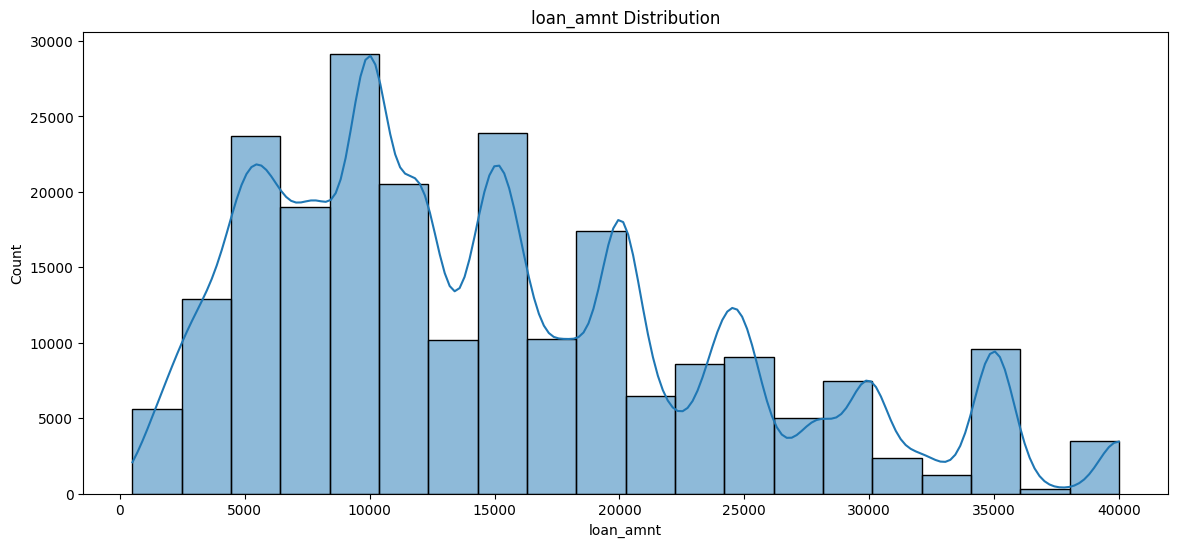

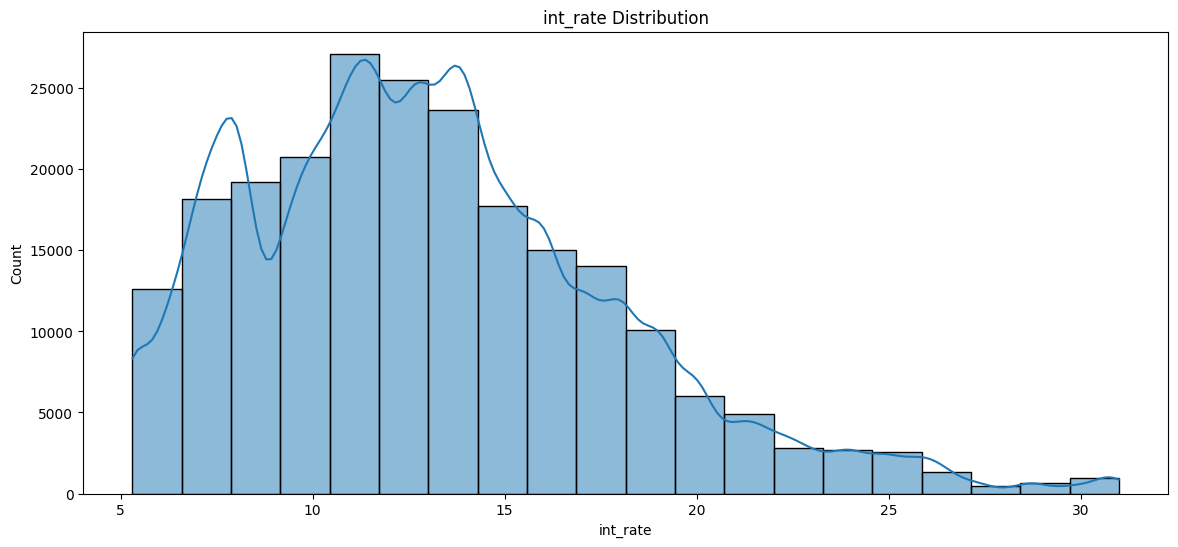

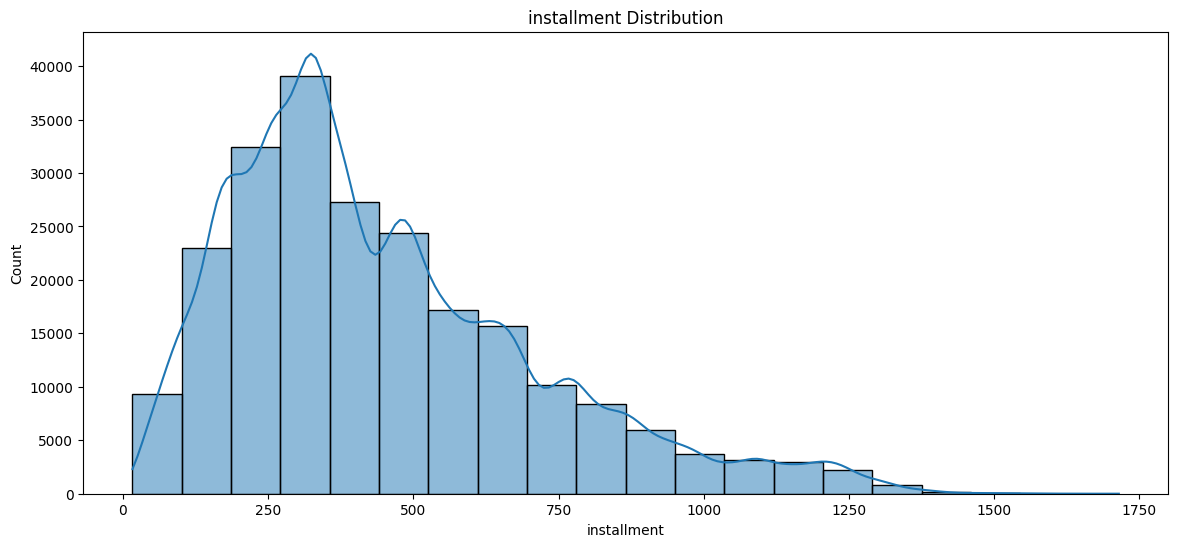

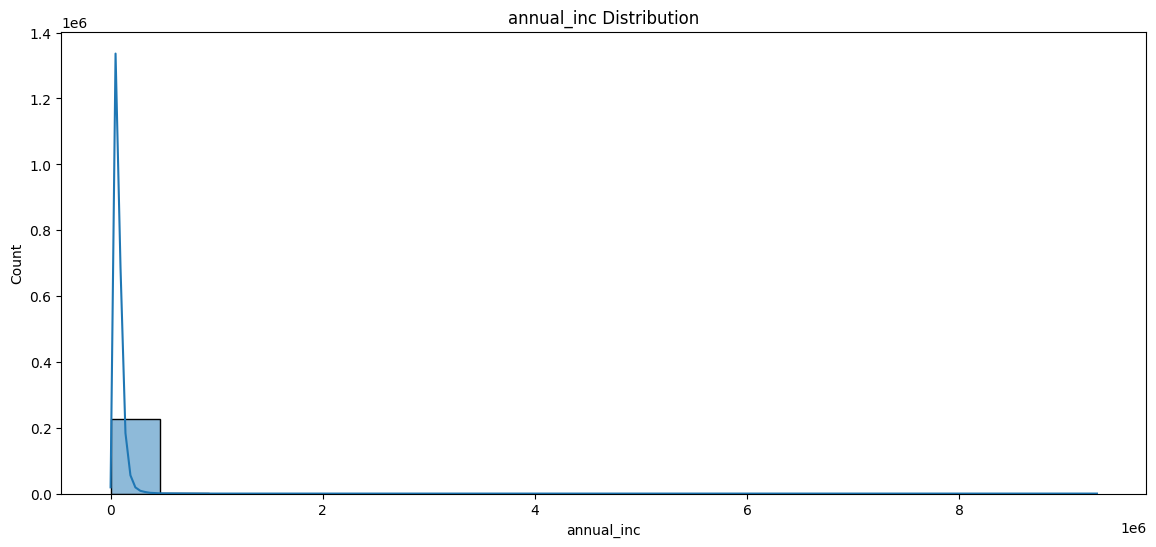

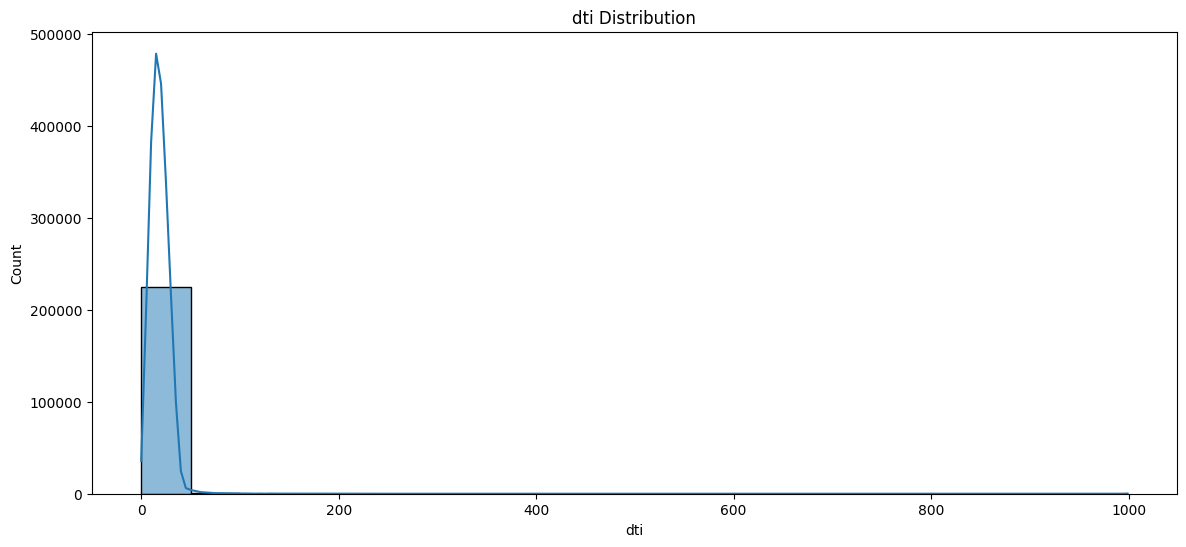

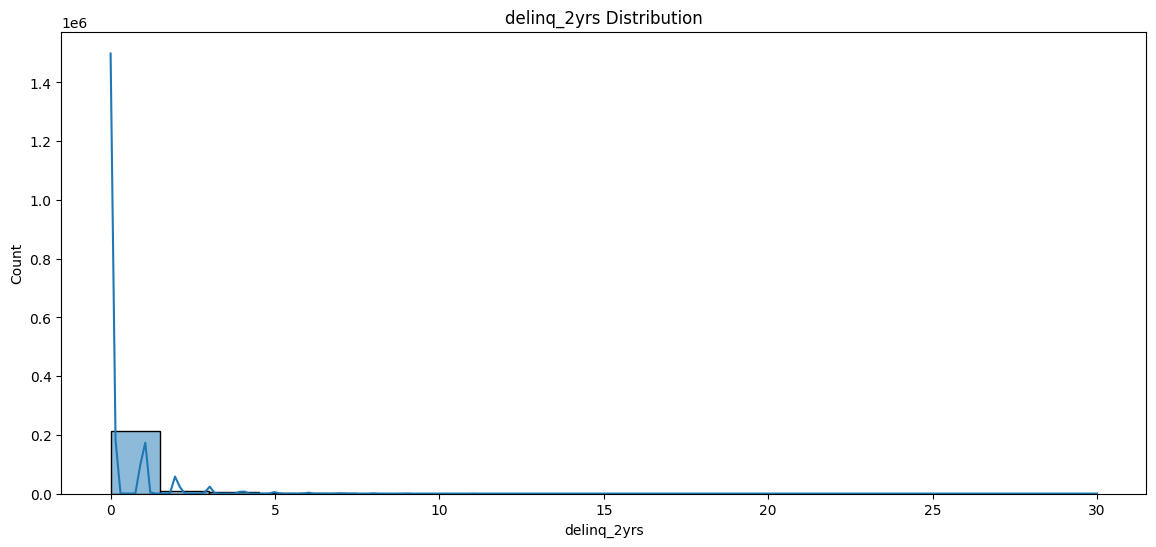

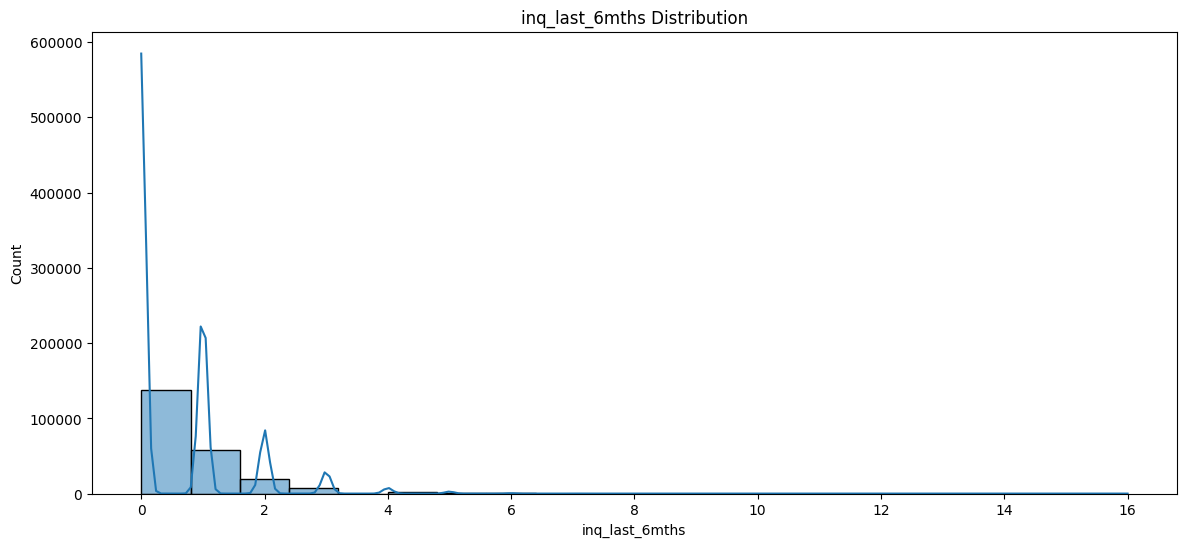

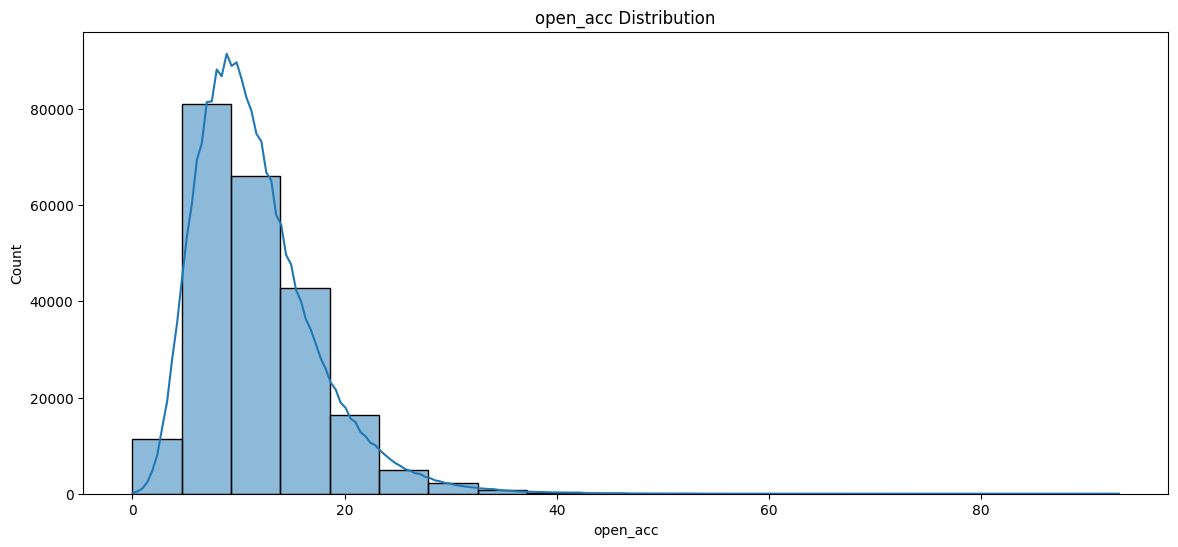

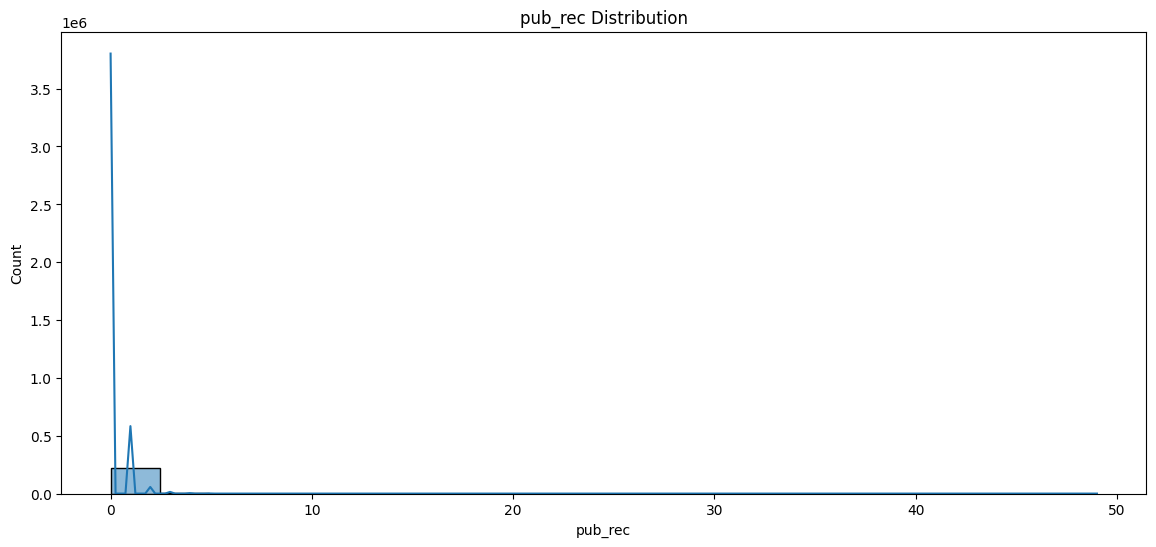

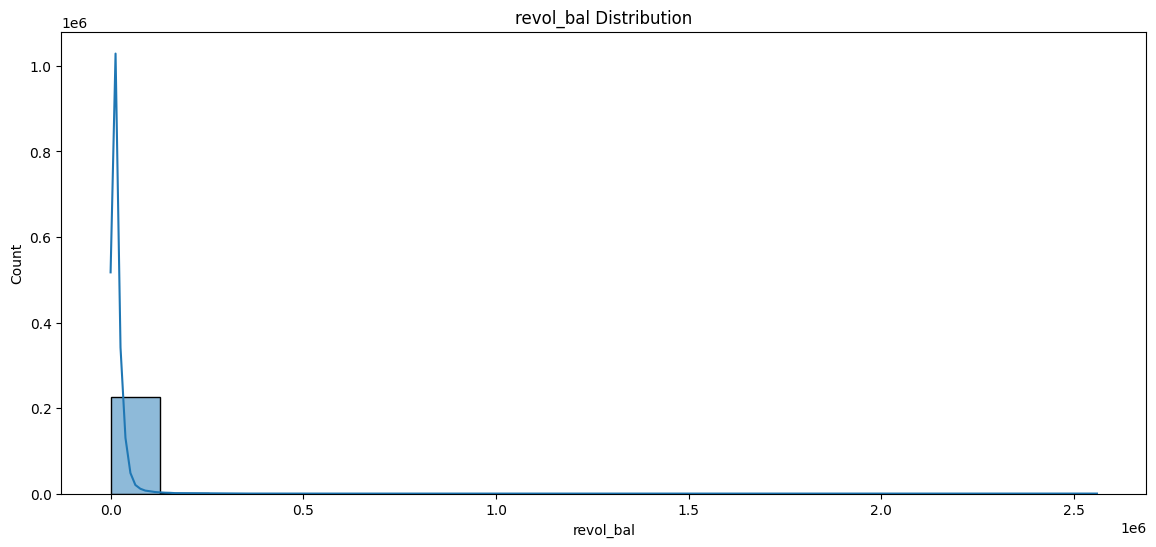

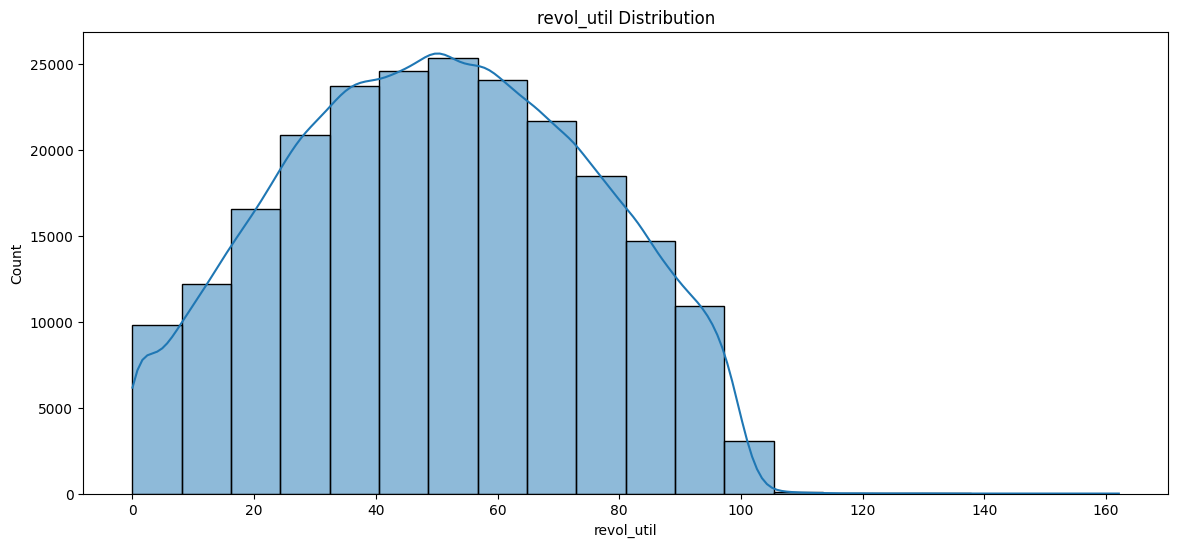

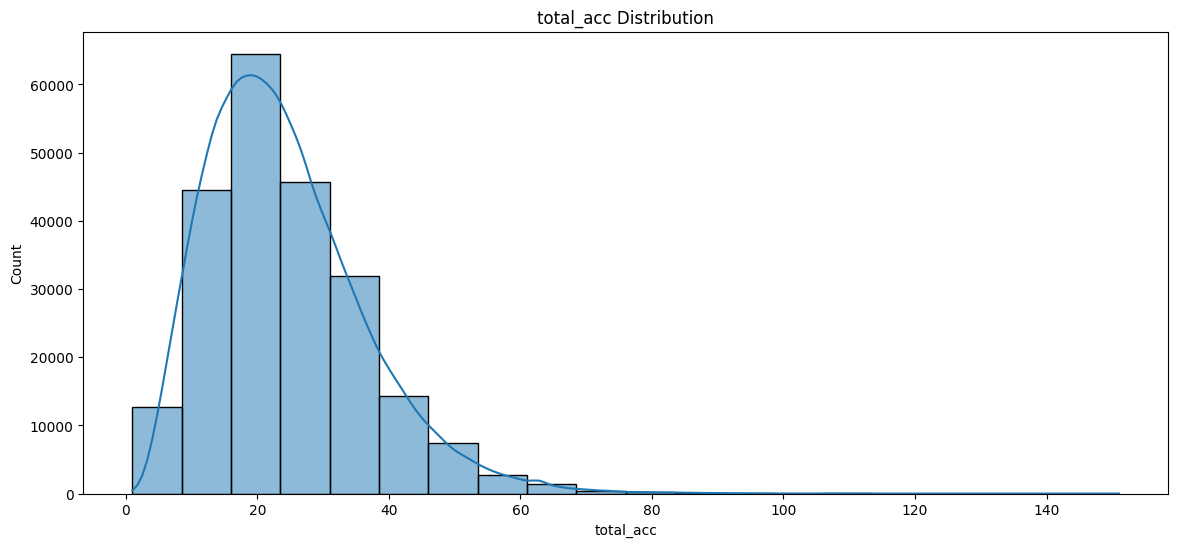

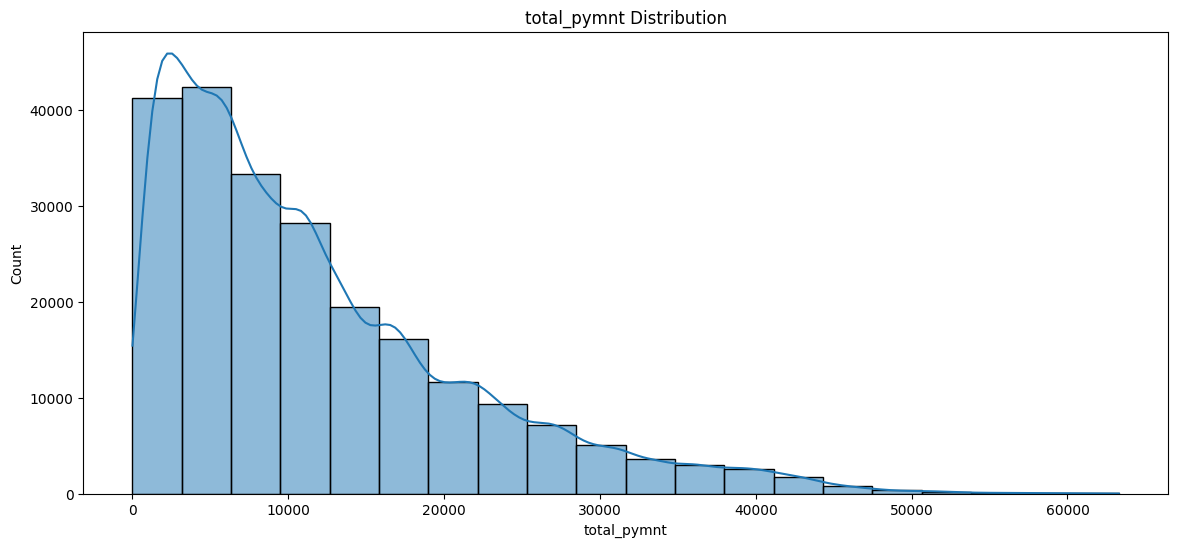

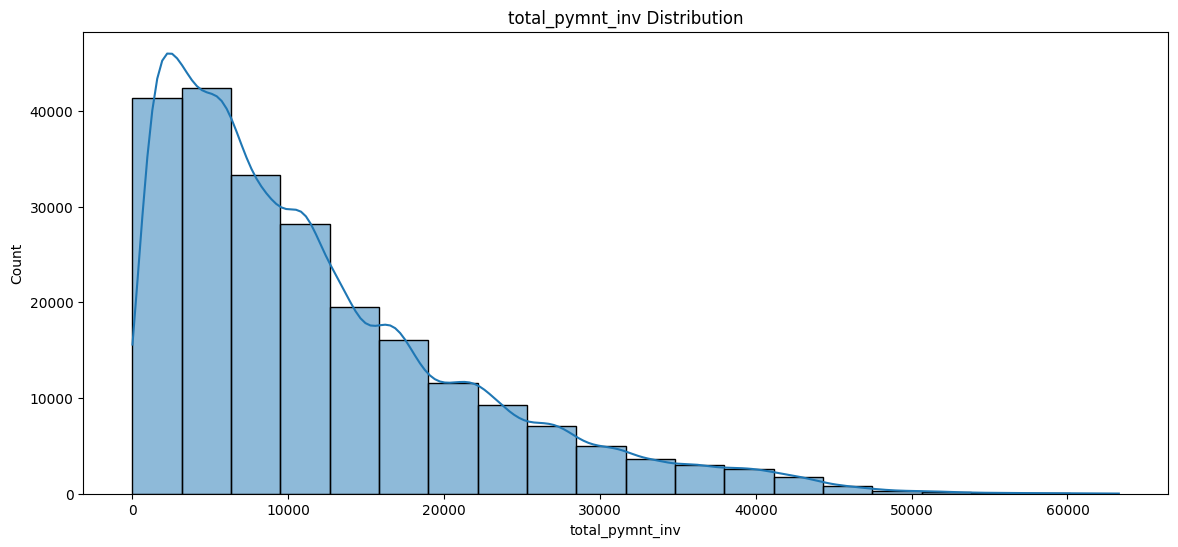

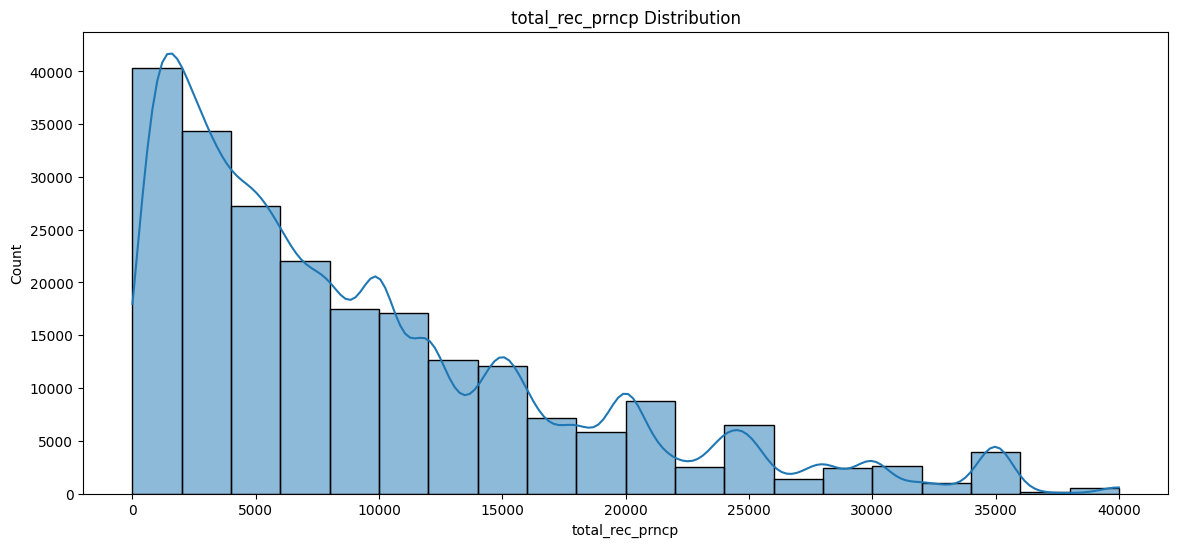

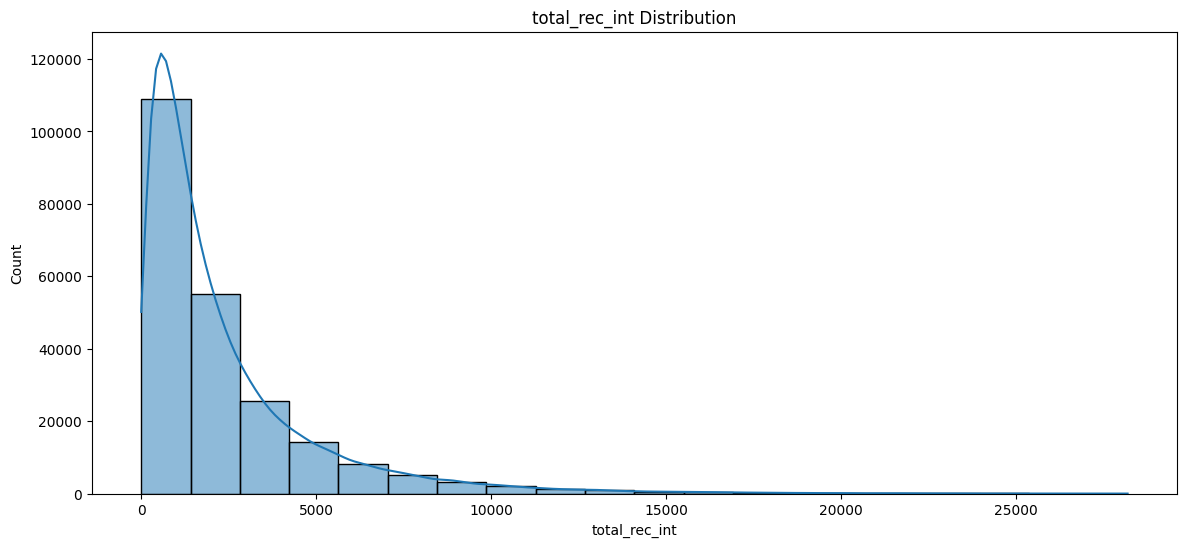

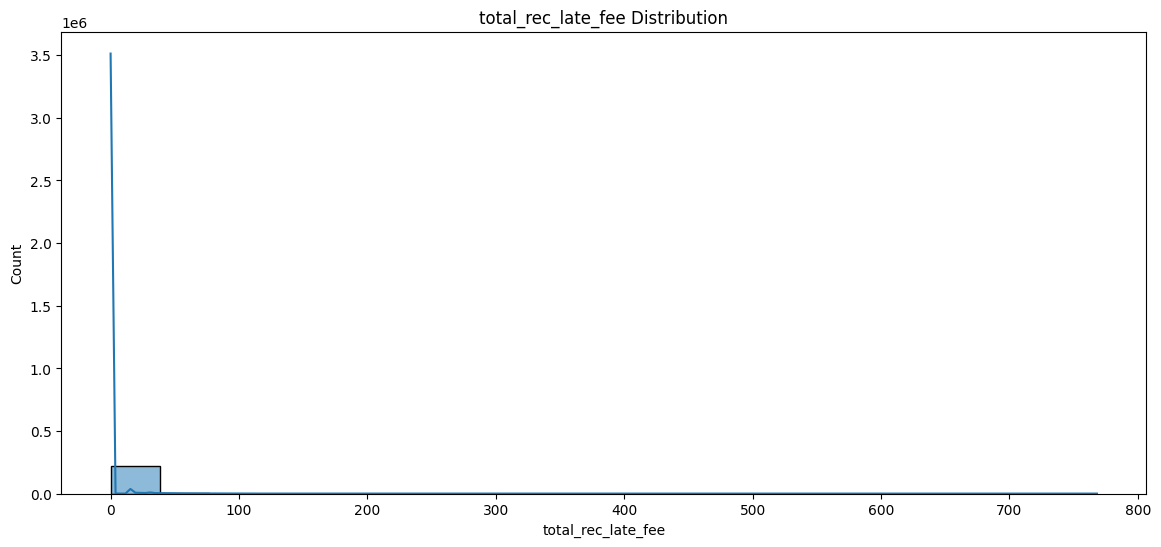

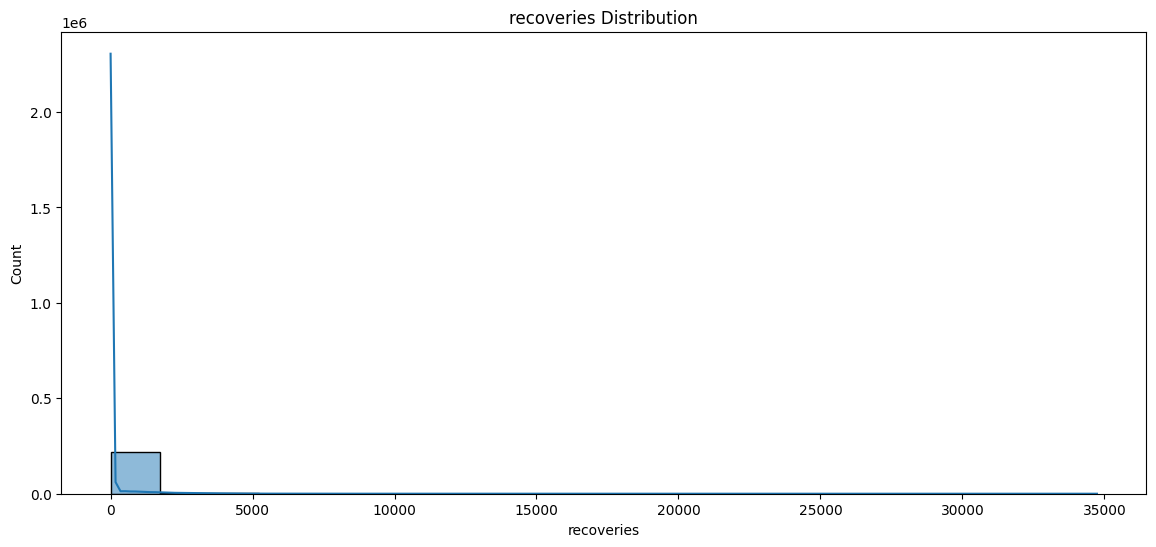

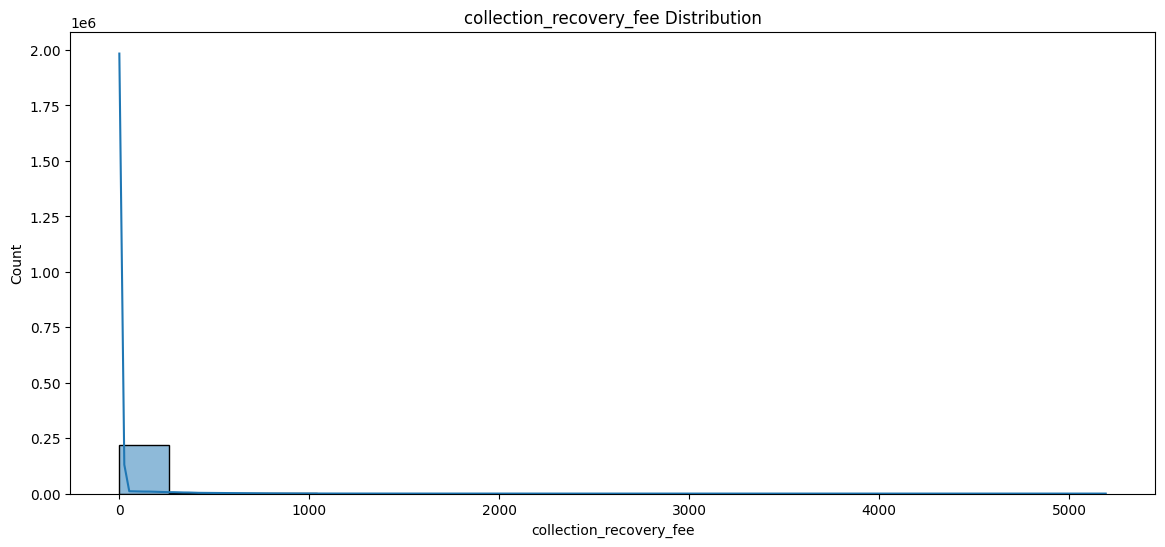

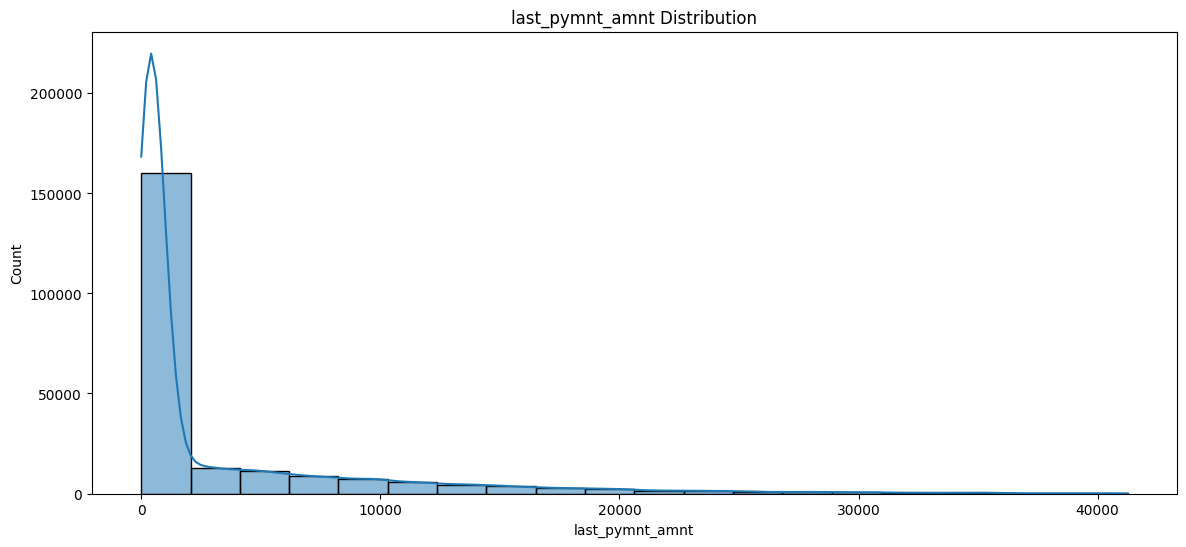

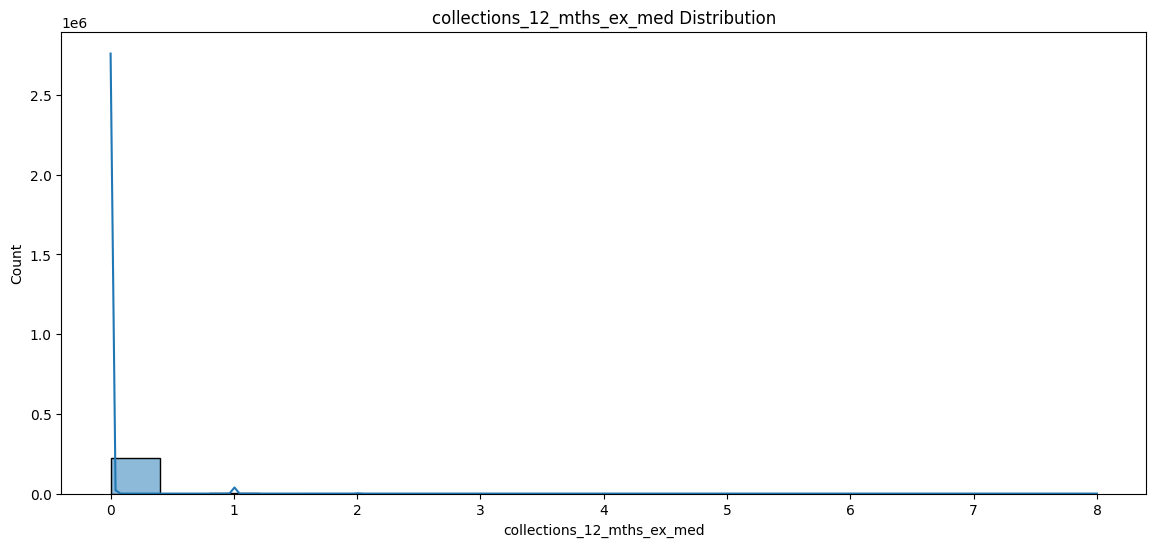

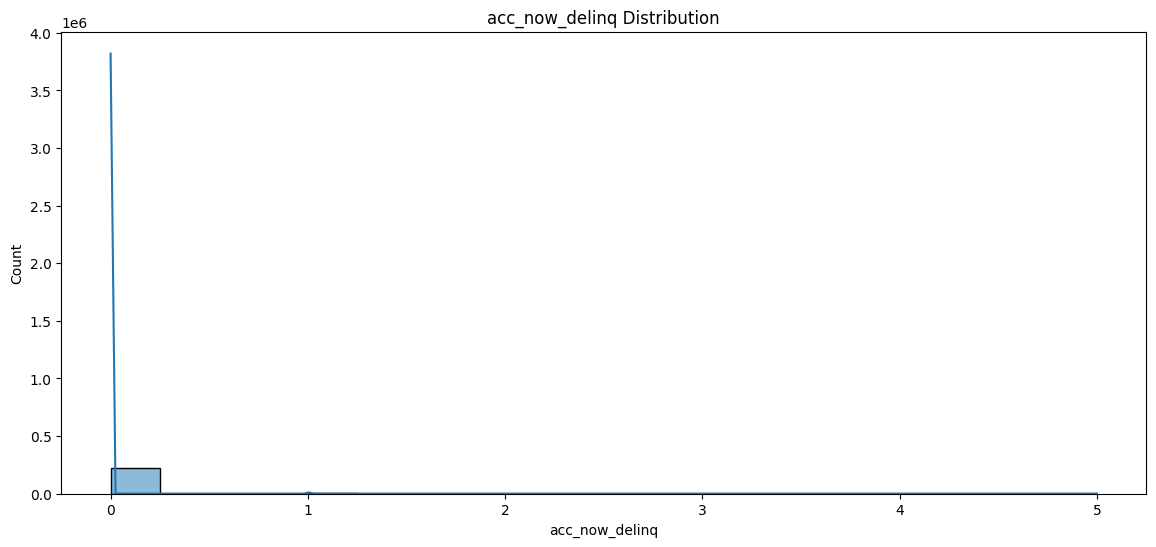

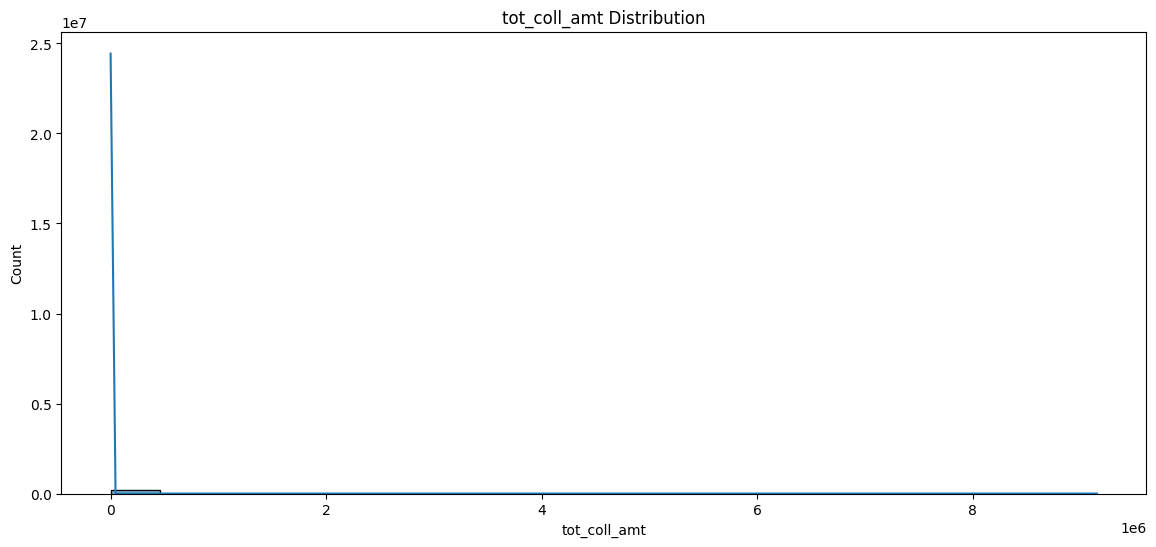

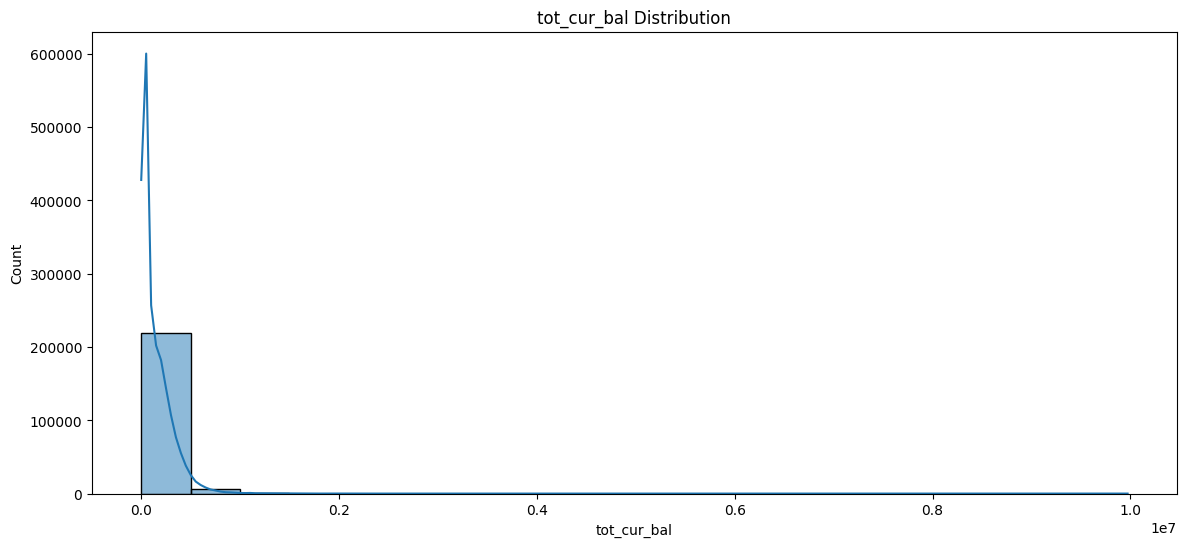

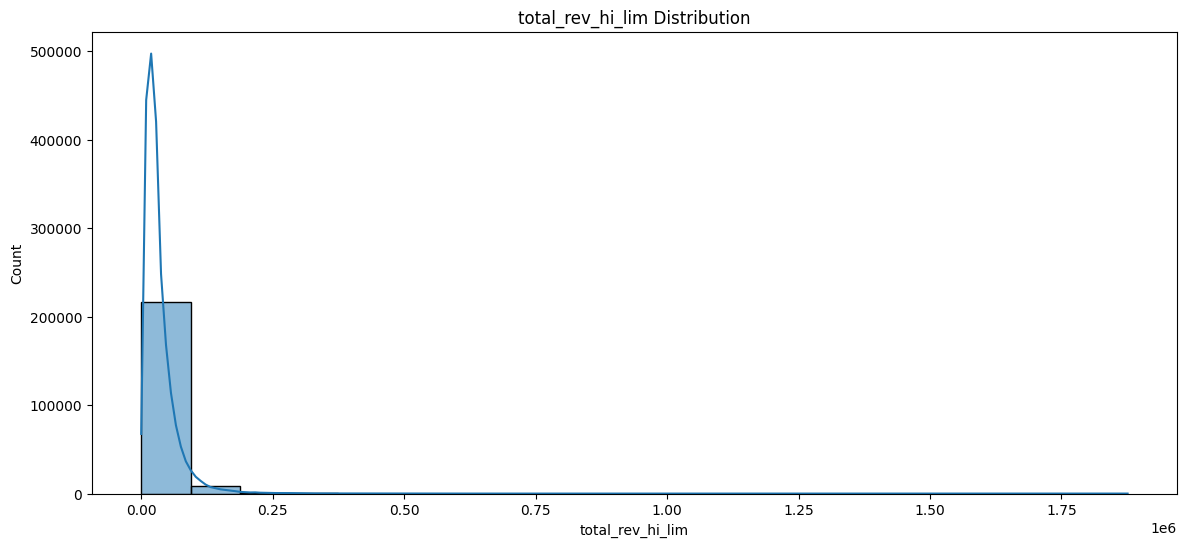

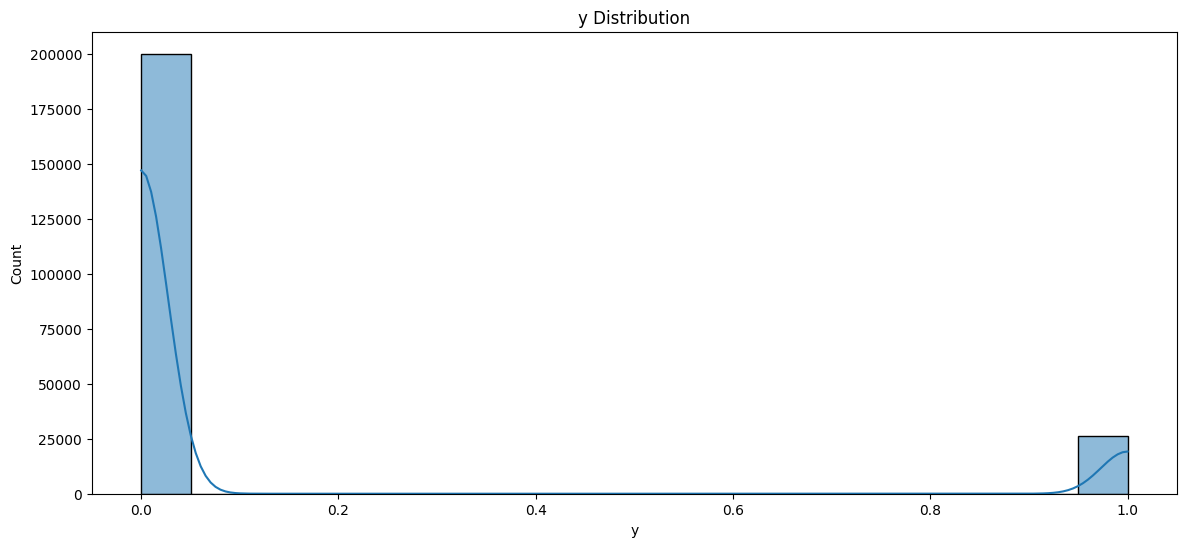

In [24]:
for i in loan_num:
    # Create subplots
    fig, ax = plt.subplots(figsize=(14, 6))

    # Histogram with KDE
    sns.histplot(x=trainData[i], bins=20, kde=True, ax=ax)
    ax.set_title(f'{i} Distribution')

    # Display plot
    plt.show()


In [25]:
trainData_New = pd.get_dummies(trainData)

In [26]:
trainData_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    226067 non-null  int64  
 1   int_rate                     226067 non-null  float64
 2   installment                  226067 non-null  float64
 3   annual_inc                   226067 non-null  float64
 4   dti                          226067 non-null  float64
 5   delinq_2yrs                  226067 non-null  float64
 6   inq_last_6mths               226067 non-null  float64
 7   open_acc                     226067 non-null  float64
 8   pub_rec                      226067 non-null  float64
 9   revol_bal                    226067 non-null  int64  
 10  revol_util                   226067 non-null  float64
 11  total_acc                    226067 non-null  float64
 12  total_pymnt                  226067 non-null  float64
 13 

### **Applying same data visualization on Test Data**

In [27]:
# Lets segregate our datatype into numerical and categorical datatype

numerical = testData.select_dtypes('number').columns.to_list()
categorical = testData.select_dtypes('object').columns.to_list()

loan_num_test = testData[numerical]
loan_cat_test = testData[categorical]

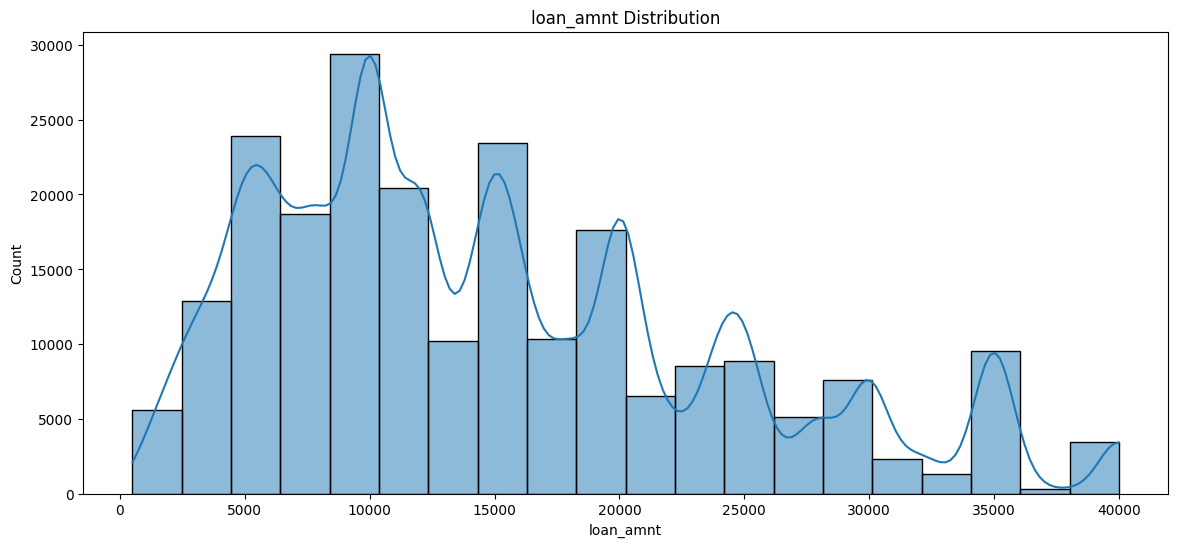

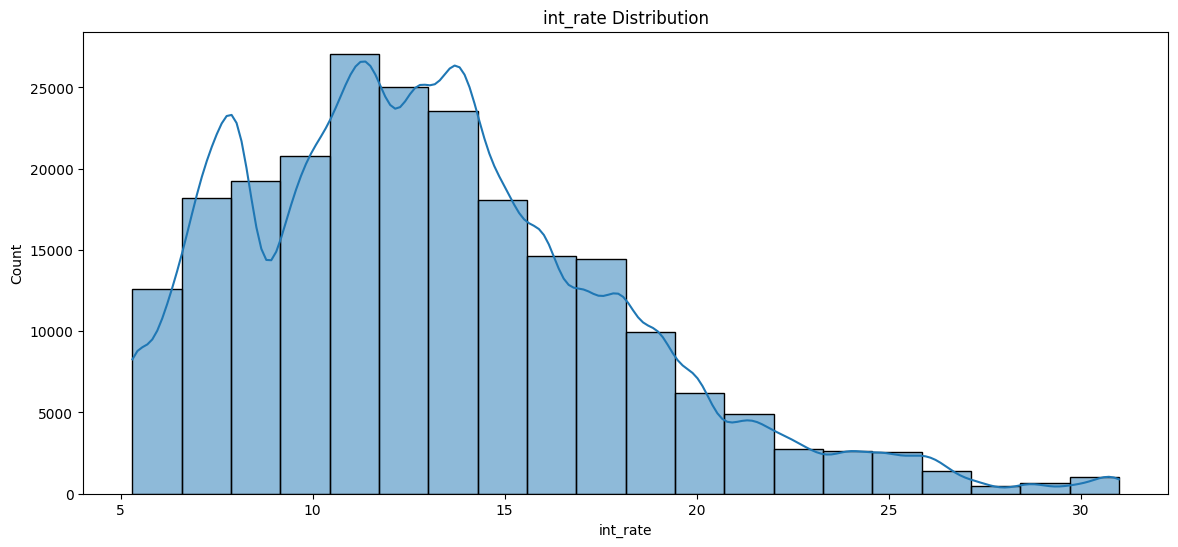

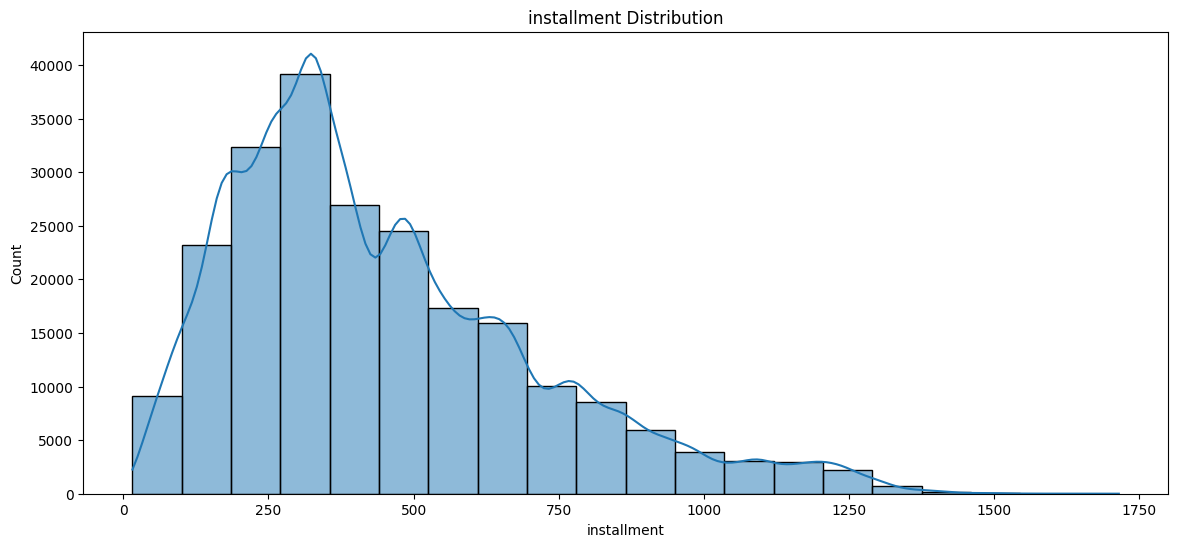

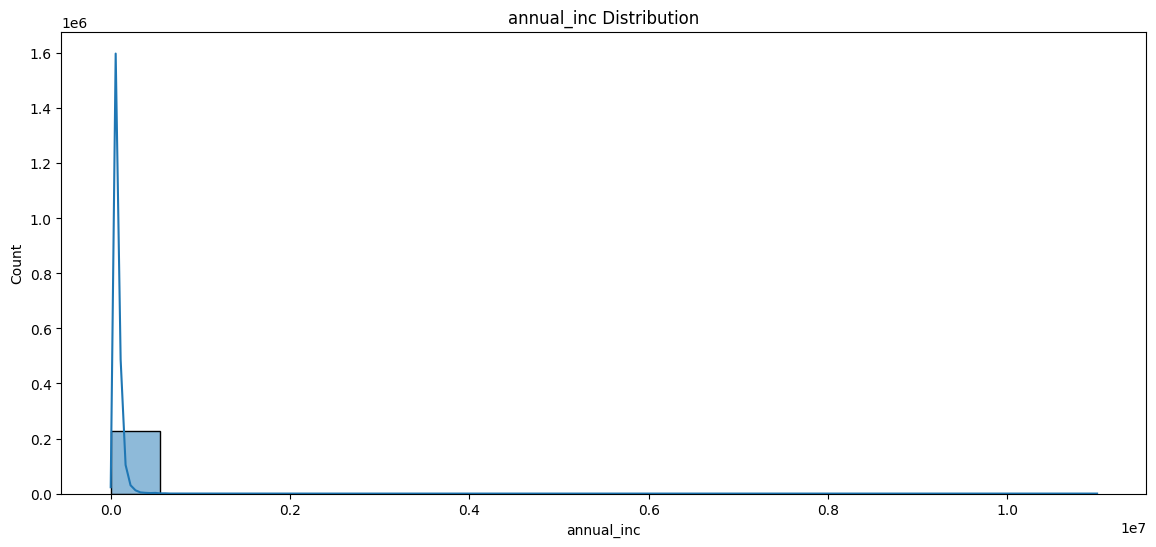

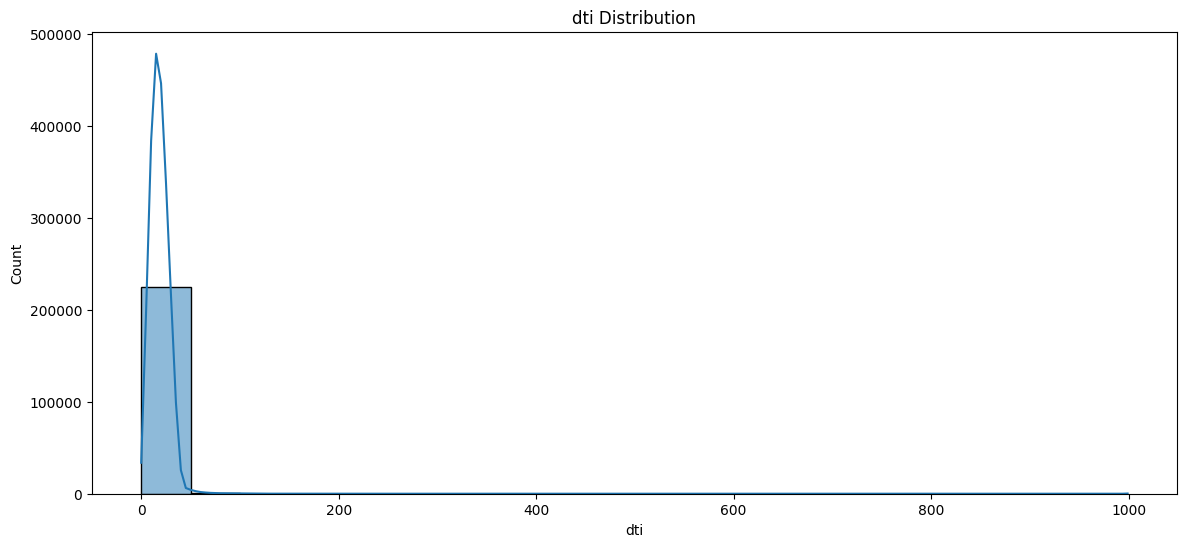

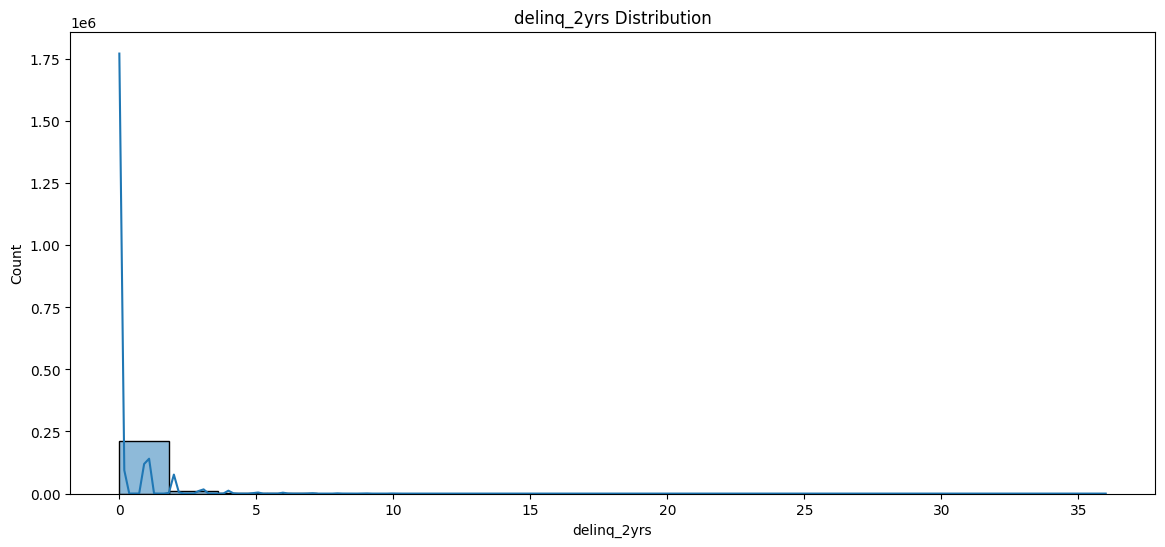

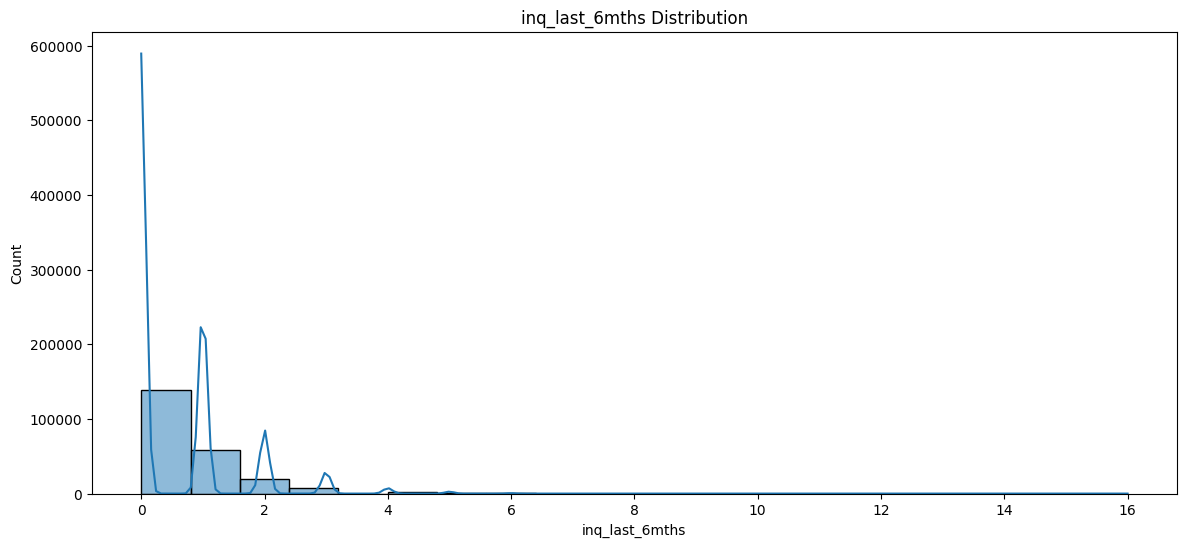

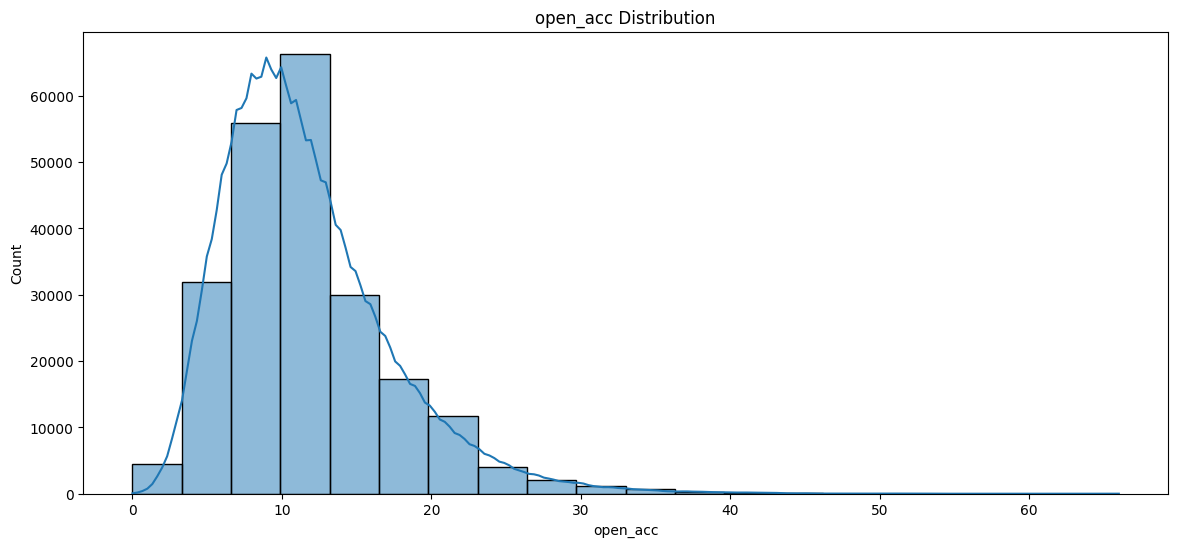

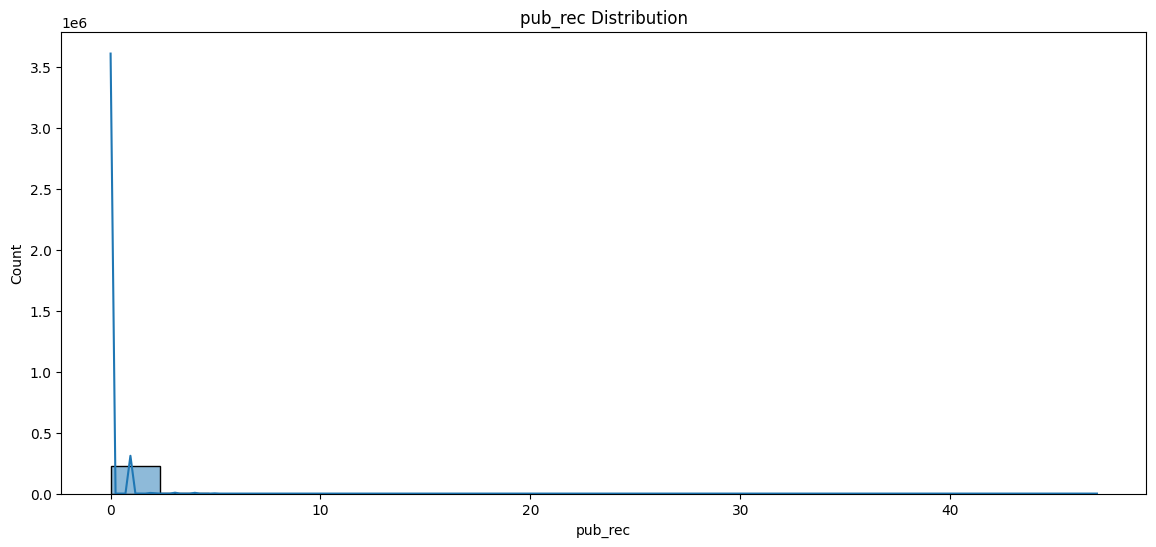

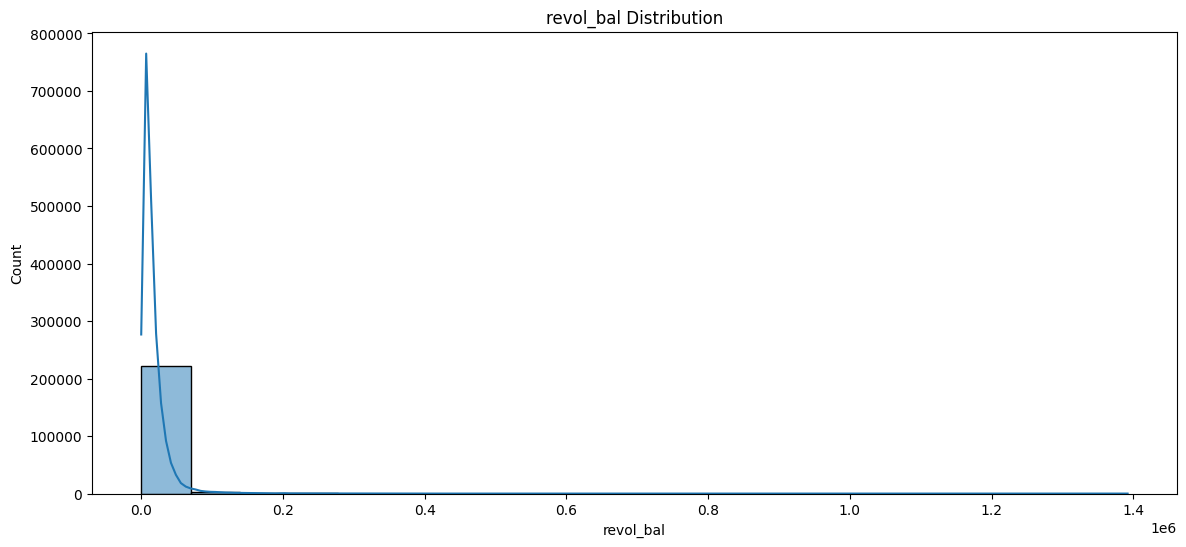

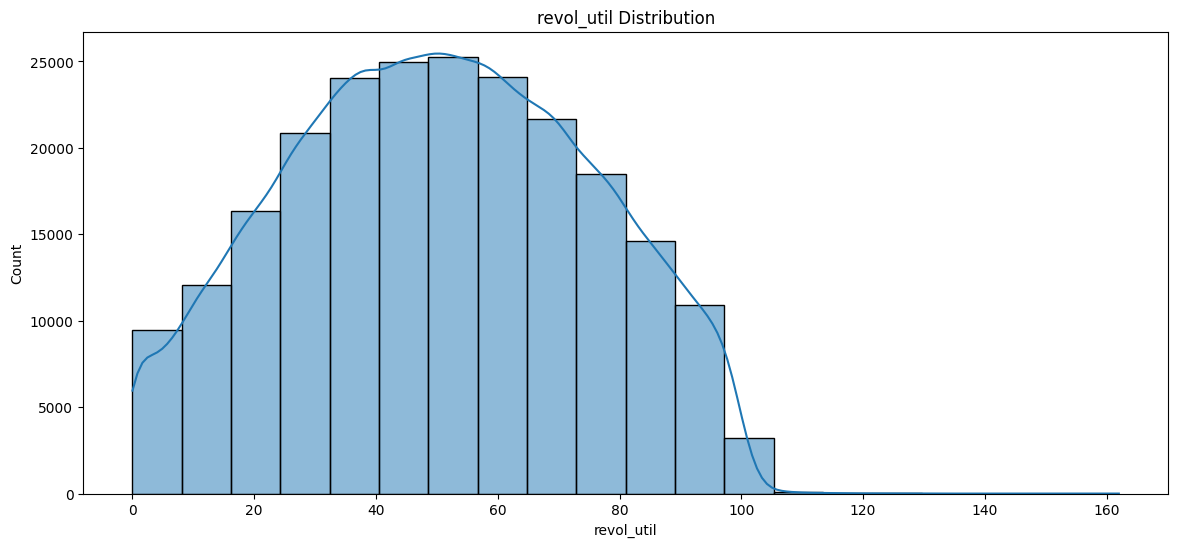

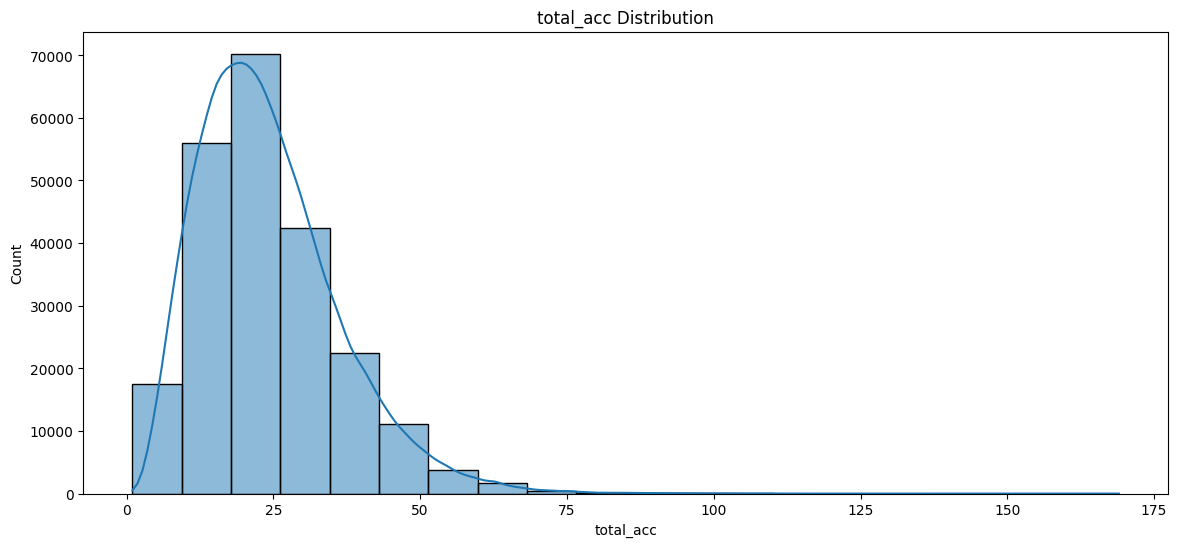

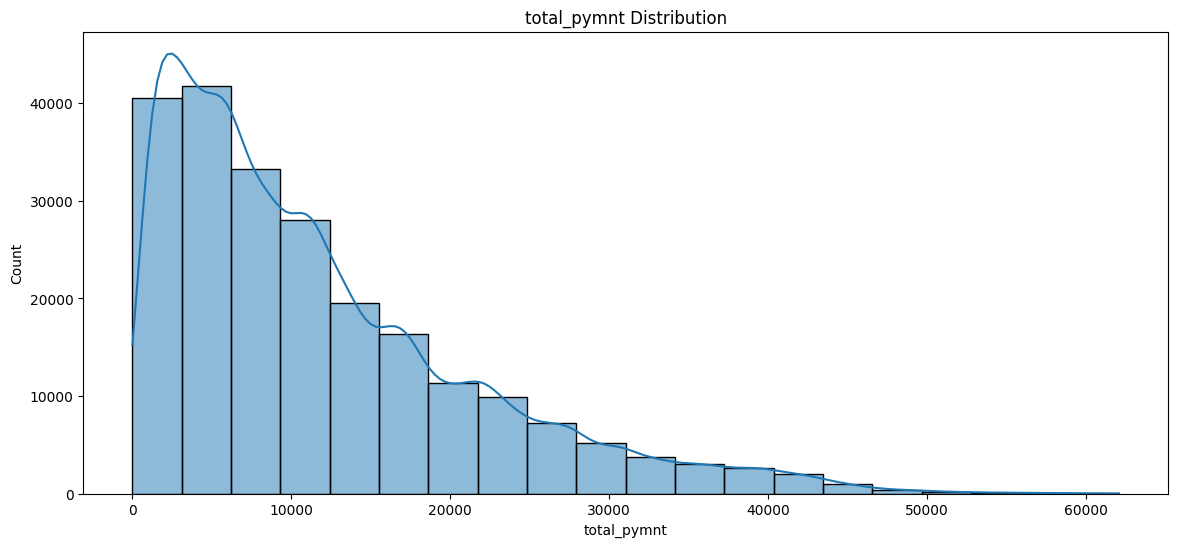

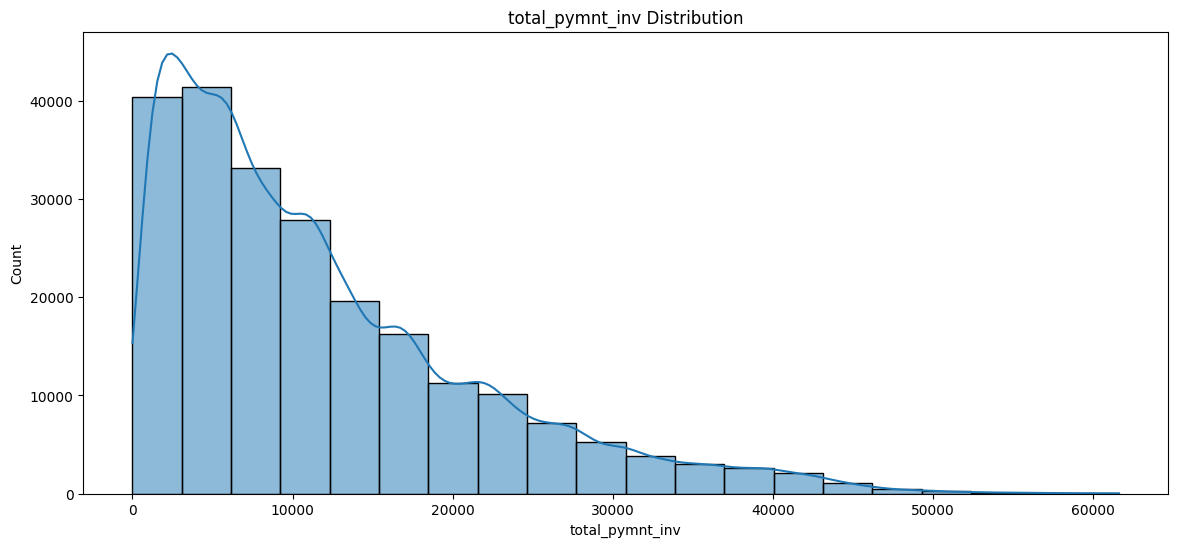

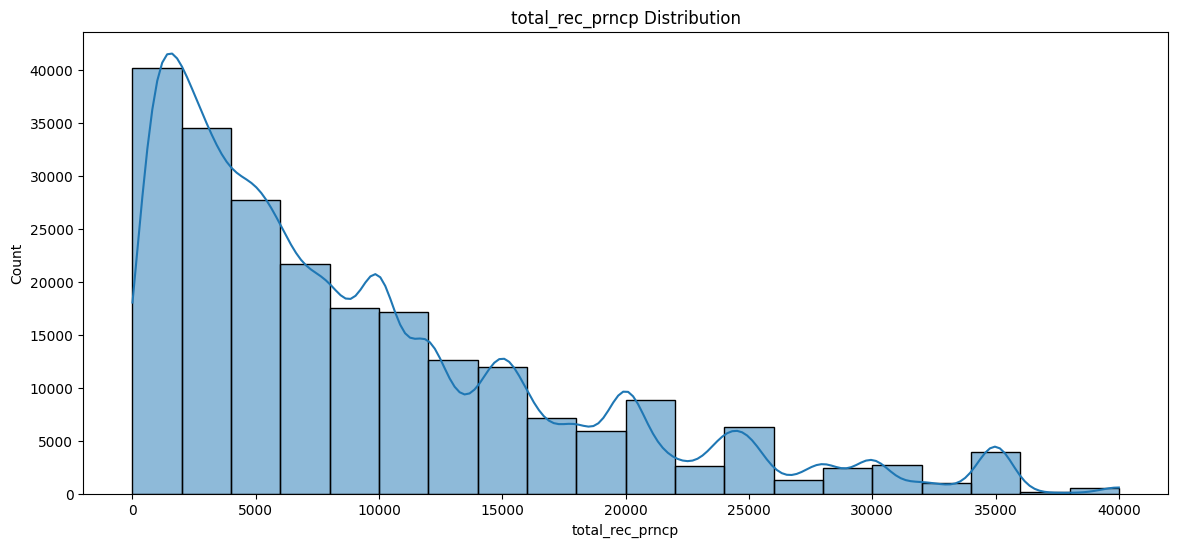

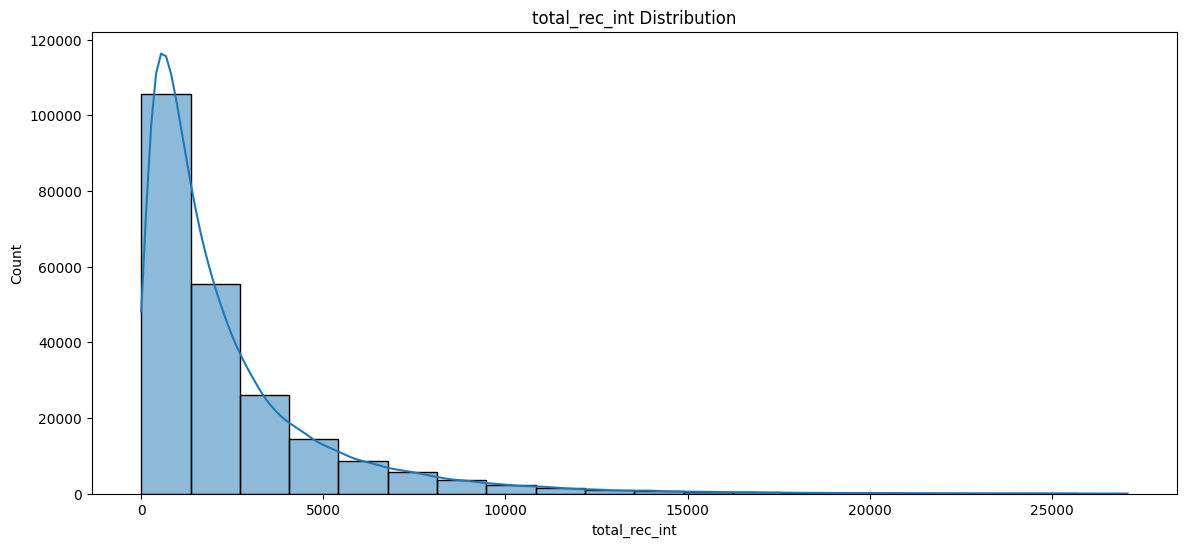

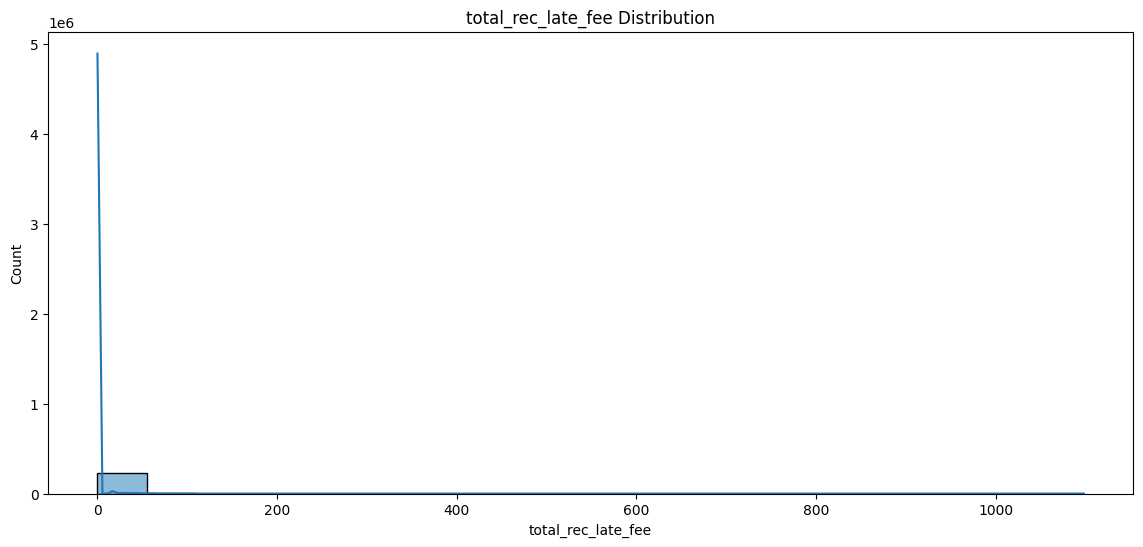

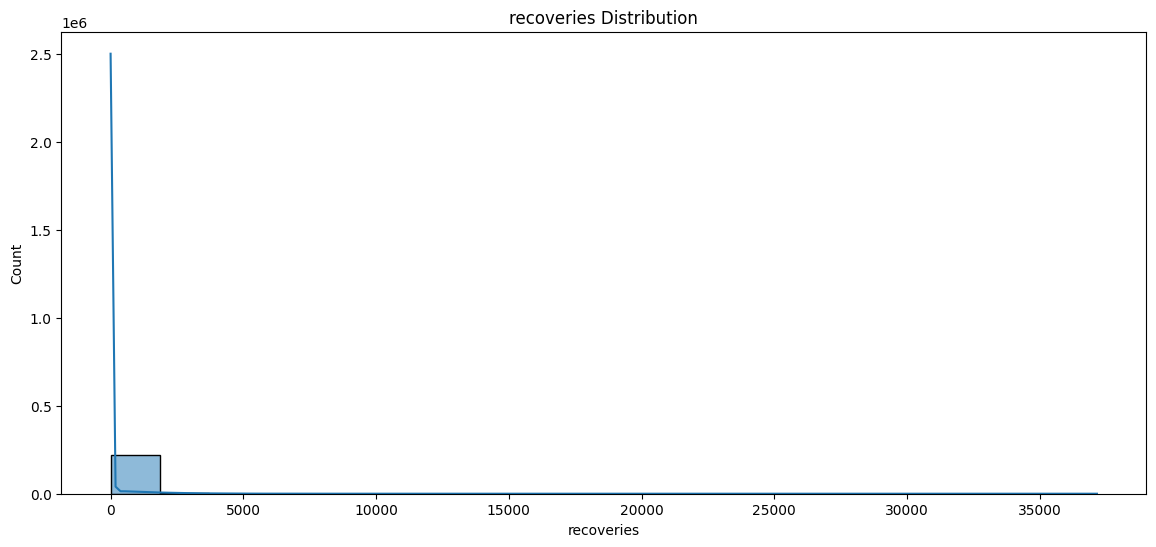

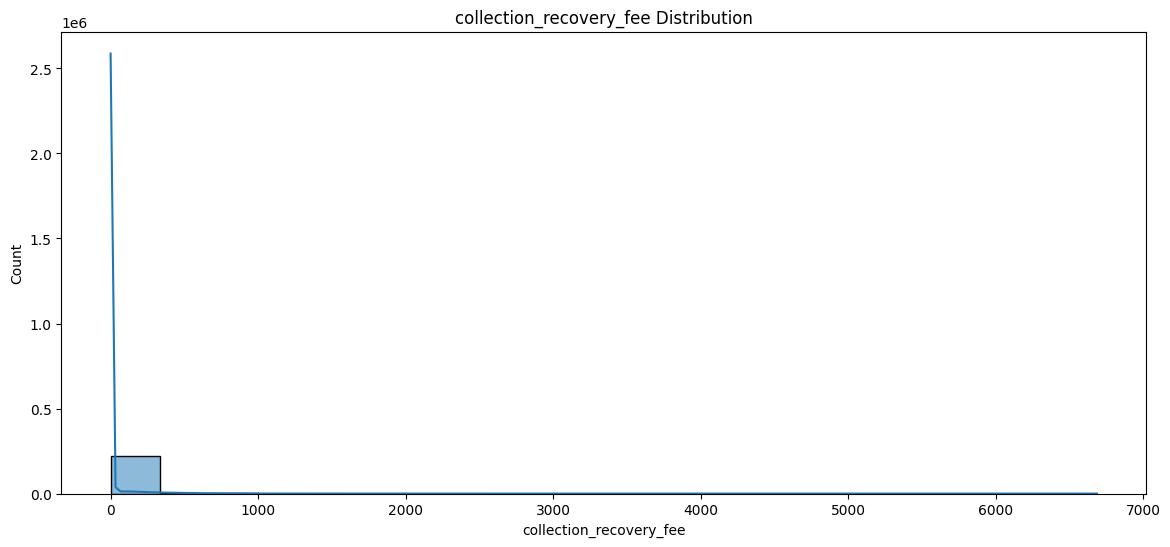

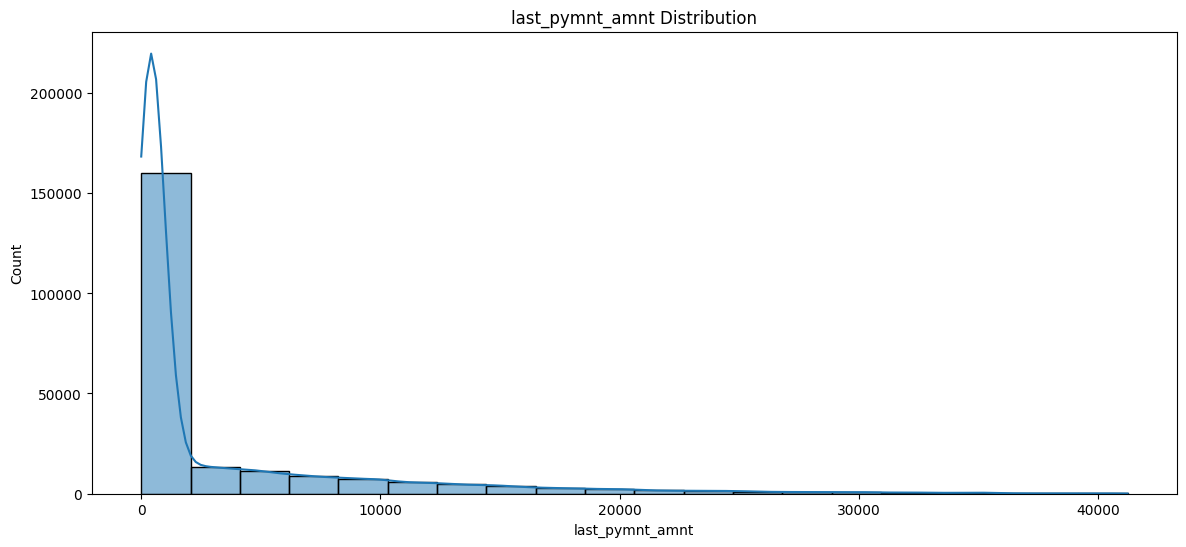

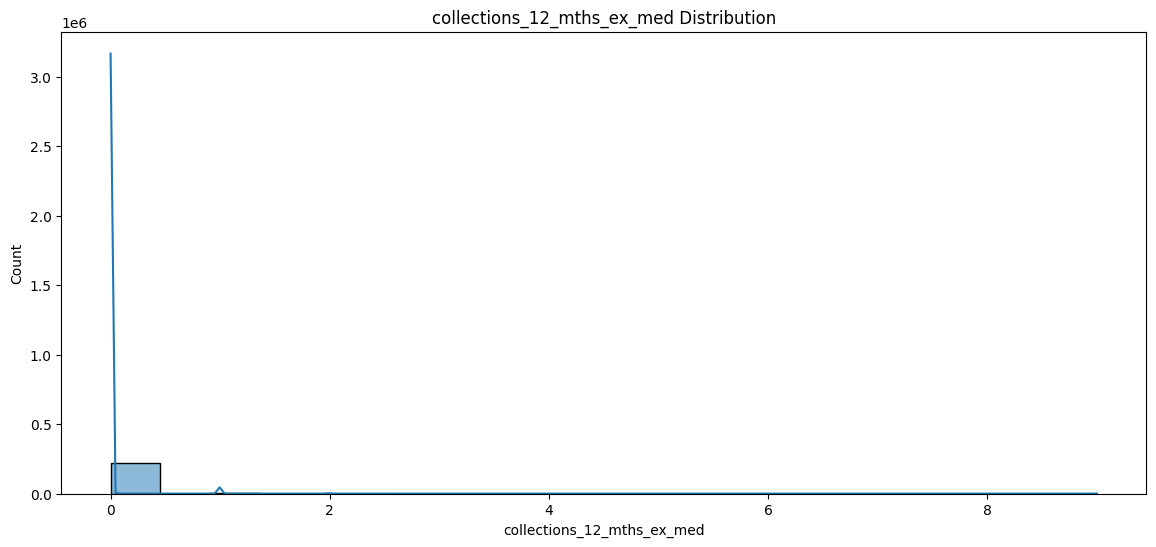

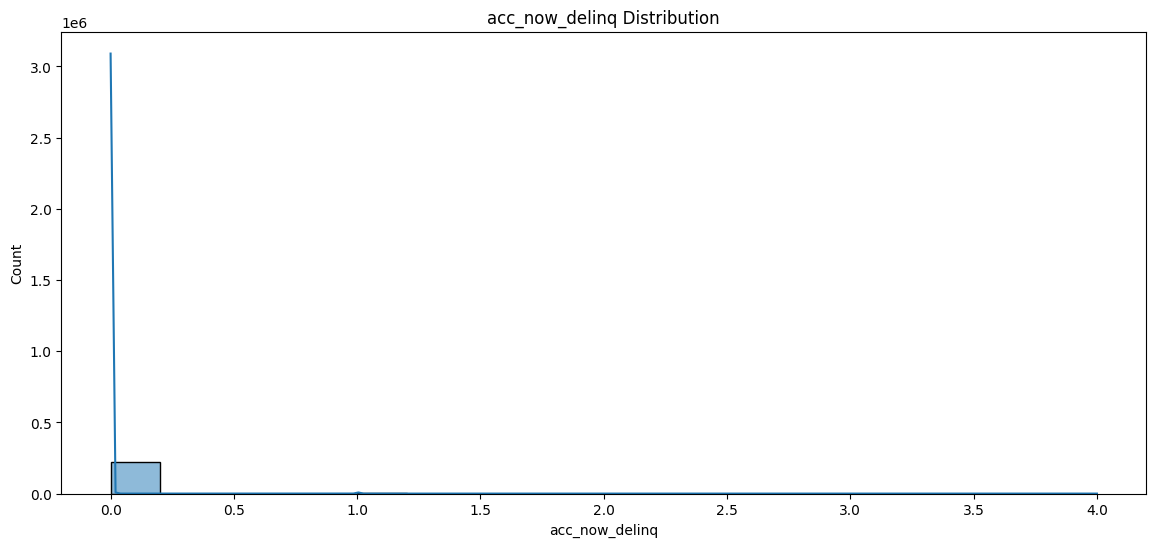

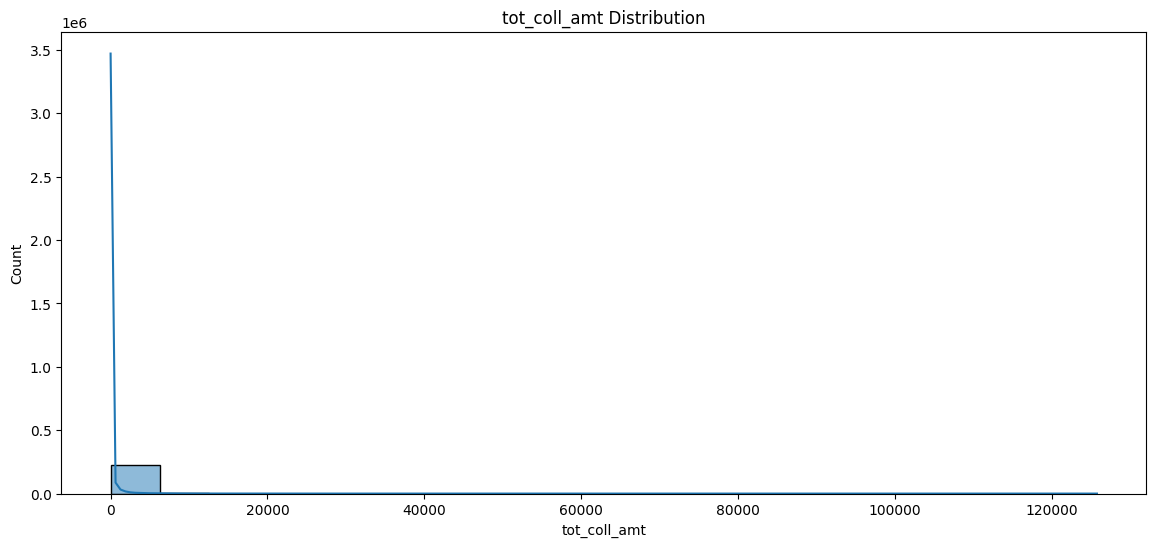

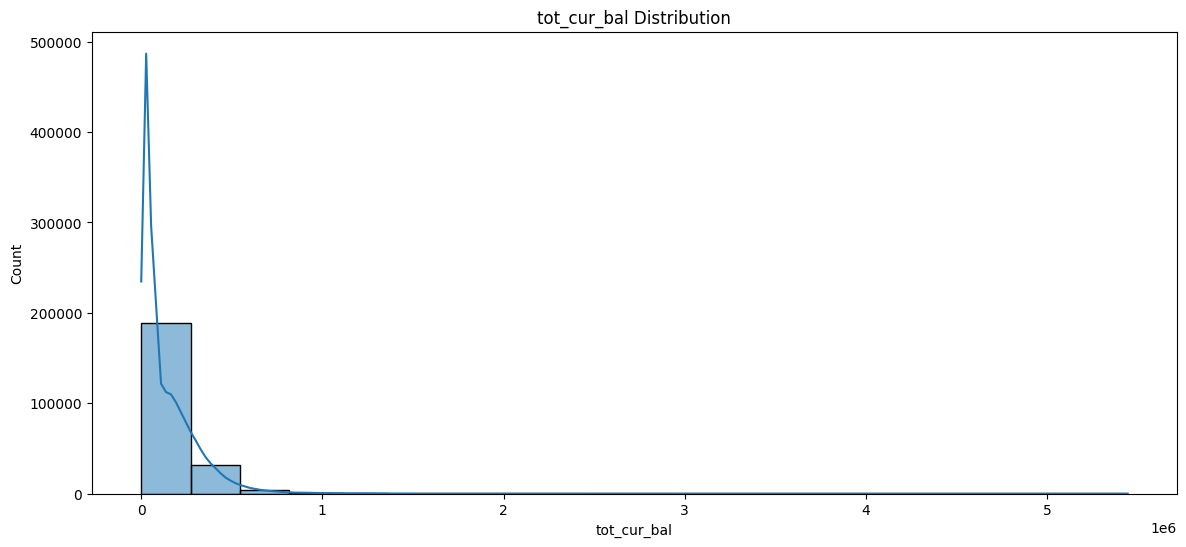

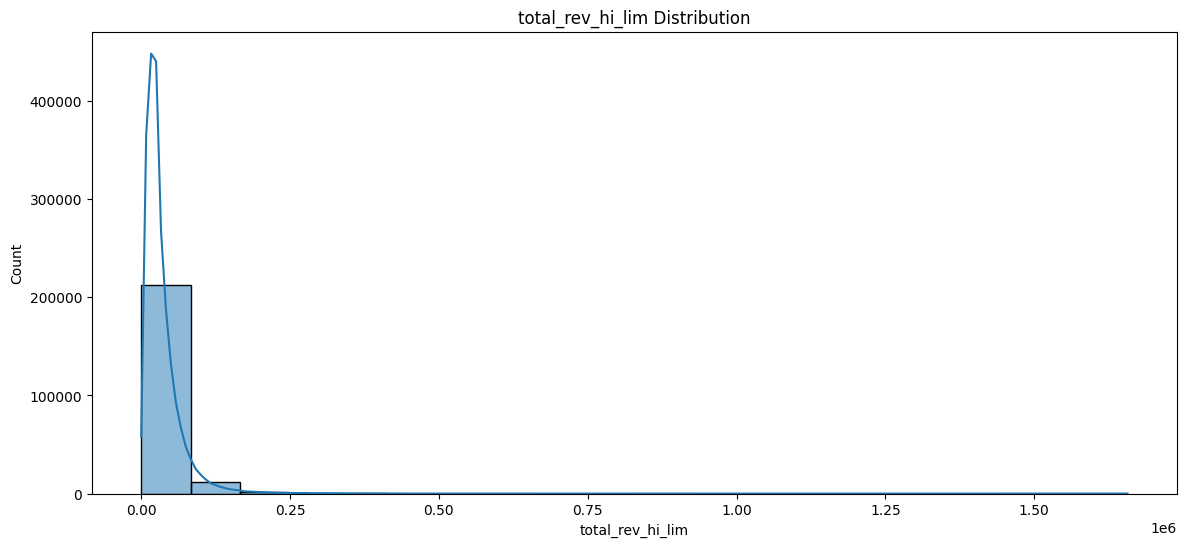

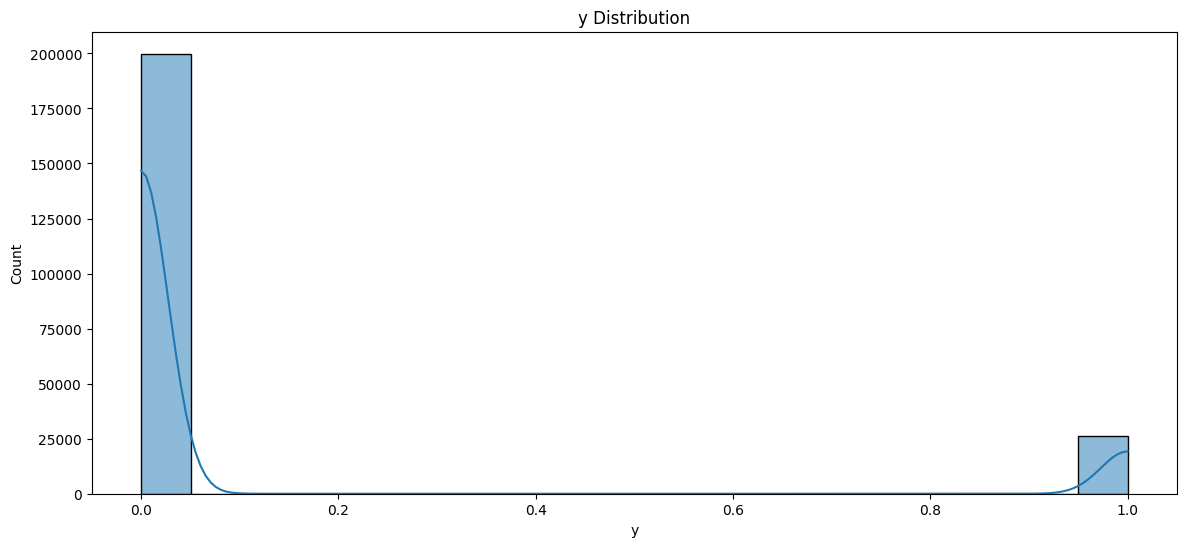

In [28]:
for i in loan_num_test:
    # Create subplots
    fig, ax = plt.subplots(figsize=(14, 6))

    # Histogram with KDE
    sns.histplot(x=testData[i], bins=20, kde=True, ax=ax)
    ax.set_title(f'{i} Distribution')

    # Display plot
    plt.show()

In [29]:
testData_New = pd.get_dummies(testData)

In [30]:
testData_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    226067 non-null  int64  
 1   int_rate                     226067 non-null  float64
 2   installment                  226067 non-null  float64
 3   annual_inc                   226067 non-null  float64
 4   dti                          226067 non-null  float64
 5   delinq_2yrs                  226067 non-null  float64
 6   inq_last_6mths               226067 non-null  float64
 7   open_acc                     226067 non-null  float64
 8   pub_rec                      226067 non-null  float64
 9   revol_bal                    226067 non-null  int64  
 10  revol_util                   226067 non-null  float64
 11  total_acc                    226067 non-null  float64
 12  total_pymnt                  226067 non-null  float64
 13 

# **Correlation Matrix**
### **Train Data**

In [31]:
# Creating a correlation between the training dataset
corr_matrix = trainData_New.corr()
corr_matrix

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
loan_amnt,1.000000,0.096998,0.945386,0.274254,0.044238,-0.009870,-0.030418,0.180423,-0.059027,0.308086,...,0.007600,-0.005360,-0.002588,0.177008,0.002349,-0.003672,-0.024662,-0.164927,-0.117555,0.117555
int_rate,0.096998,1.000000,0.123437,-0.071241,0.122897,0.058271,0.190102,-0.011511,0.053372,-0.027798,...,-0.000836,0.001581,0.000666,-0.074363,0.004263,0.001229,0.002992,0.073982,-0.028152,0.028152
installment,0.945386,0.123437,1.000000,0.264441,0.044240,0.001854,-0.004437,0.168733,-0.047771,0.296044,...,0.006743,-0.003637,-0.002215,0.142031,0.002737,-0.002609,-0.017686,-0.133697,-0.101378,0.101378
annual_inc,0.274254,-0.071241,0.264441,1.000000,-0.113392,0.033409,0.026342,0.134028,-0.001905,0.270088,...,0.009052,-0.018520,-0.002612,0.124651,-0.000994,0.001866,-0.019795,-0.114601,0.049100,-0.049100
dti,0.044238,0.122897,0.044240,-0.113392,1.000000,-0.013467,-0.011095,0.186959,-0.027210,0.103755,...,0.002123,-0.000886,-0.003024,0.026405,0.000550,-0.004289,0.005530,-0.030337,-0.209715,0.209715
delinq_2yrs,-0.009870,0.058271,0.001854,0.033409,-0.013467,1.000000,0.023149,0.049089,-0.020444,-0.022300,...,-0.005473,-0.005658,-0.001908,0.040665,0.001695,0.000832,0.003173,-0.043551,0.012866,-0.012866
inq_last_6mths,-0.030418,0.190102,-0.004437,0.026342,-0.011095,0.023149,1.000000,0.138000,0.064255,-0.013274,...,0.002408,-0.005283,-0.004247,0.021561,-0.000944,0.013178,0.000145,-0.022177,0.050129,-0.050129
open_acc,0.180423,-0.011511,0.168733,0.134028,0.186959,0.049089,0.138000,1.000000,-0.017119,0.228803,...,0.011970,-0.021026,-0.002824,0.134354,-0.000458,-0.002455,-0.013848,-0.128255,0.023722,-0.023722
pub_rec,-0.059027,0.053372,-0.047771,-0.001905,-0.027210,-0.020444,0.064255,-0.017119,1.000000,-0.081228,...,-0.001101,-0.023610,-0.001074,-0.003080,-0.001928,-0.003093,-0.000781,0.003773,0.019398,-0.019398
revol_bal,0.308086,-0.027798,0.296044,0.270088,0.103755,-0.022300,-0.013274,0.228803,-0.081228,1.000000,...,0.009956,-0.015617,-0.003078,0.148748,0.000131,-0.001993,0.001615,-0.152899,-0.000039,0.000039


In [32]:
# Calculate the correlation between 'y' (target variable) and all other variables
target_correlation = trainData_New.corr()['y'].sort_values(ascending=False)

# Exclude the target variable itself from the list
target_correlation = target_correlation.drop('y')

# Get the 10 most correlated variables
top_10_correlated = target_correlation.head(10)

# Get the 10 least correlated variables
bottom_10_correlated = target_correlation.tail(10)

print("Top 10 most correlated variables with the target variable:")
print(top_10_correlated)
print("\nTop 10 least correlated variables with the target variable:")
print(bottom_10_correlated)

Top 10 most correlated variables with the target variable:
recoveries                 0.516998
collection_recovery_fee    0.492596
int_rate                   0.198602
grade_E                    0.115201
total_rec_late_fee         0.101508
grade_F                    0.100802
grade_D                    0.089890
inq_last_6mths             0.087965
revol_util                 0.067855
grade_G                    0.057430
Name: y, dtype: float64

Top 10 least correlated variables with the target variable:
home_ownership_MORTGAGE      -0.043965
tot_cur_bal                  -0.051377
application_type_Joint App   -0.051467
total_rev_hi_lim             -0.057365
grade_B                      -0.078461
grade_A                      -0.128235
total_pymnt_inv              -0.132253
total_pymnt                  -0.132429
last_pymnt_amnt              -0.174919
total_rec_prncp              -0.216278
Name: y, dtype: float64


### **Test Data**

In [33]:
# Creating a correlation between the test dataset
corr_matrix = testData_New.corr()
corr_matrix

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
loan_amnt,1.000000,0.101543,0.945325,0.267902,0.041072,-0.010069,-0.028382,0.180412,-0.060693,0.317213,...,0.010500,-0.010892,-0.005576,0.176137,-0.001473,-0.006588,-0.027770,-0.161700,-0.118419,0.118419
int_rate,0.101543,1.000000,0.127786,-0.066706,0.121105,0.059114,0.188096,-0.009147,0.051553,-0.027255,...,0.001915,-0.002799,0.000713,-0.070793,0.000255,0.000528,-0.001966,0.073592,-0.031339,0.031339
installment,0.945325,0.127786,1.000000,0.260335,0.042727,0.001261,-0.001928,0.169623,-0.049054,0.302193,...,0.009454,-0.009124,-0.004953,0.142430,-0.001065,-0.005376,-0.020948,-0.131712,-0.102648,0.102648
annual_inc,0.267902,-0.066706,0.260335,1.000000,-0.110078,0.039254,0.025742,0.126619,-0.004748,0.259690,...,0.004815,-0.018971,-0.003730,0.122061,-0.002156,-0.002822,-0.019787,-0.111737,0.051644,-0.051644
dti,0.041072,0.121105,0.042727,-0.110078,1.000000,-0.011883,-0.012597,0.176681,-0.024547,0.096549,...,-0.000838,-0.001872,0.000060,0.022431,0.000472,-0.002454,0.007232,-0.027559,-0.211593,0.211593
delinq_2yrs,-0.010069,0.059114,0.001261,0.039254,-0.011883,1.000000,0.022745,0.051462,-0.022510,-0.028611,...,-0.002261,-0.009053,-0.000853,0.046182,-0.001800,-0.000323,-0.001875,-0.045934,0.016288,-0.016288
inq_last_6mths,-0.028382,0.188096,-0.001928,0.025742,-0.012597,0.022745,1.000000,0.139663,0.064260,-0.009476,...,0.002029,-0.004139,-0.001929,0.027091,-0.001410,0.016038,-0.002462,-0.026347,0.050273,-0.050273
open_acc,0.180412,-0.009147,0.169623,0.126619,0.176681,0.051462,0.139663,1.000000,-0.015697,0.237558,...,0.007402,-0.024131,-0.004710,0.130378,-0.003764,-0.004655,-0.010883,-0.125895,0.023546,-0.023546
pub_rec,-0.060693,0.051553,-0.049054,-0.004748,-0.024547,-0.022510,0.064260,-0.015697,1.000000,-0.087694,...,-0.000315,-0.023353,0.000598,-0.006587,-0.000271,-0.001397,-0.001331,0.007600,0.015737,-0.015737
revol_bal,0.317213,-0.027255,0.302193,0.259690,0.096549,-0.028611,-0.009476,0.237558,-0.087694,1.000000,...,0.006684,-0.017724,-0.004107,0.153877,-0.001582,-0.000899,0.004796,-0.160182,0.002706,-0.002706


In [34]:
# Calculate the correlation between 'y' (target variable) and all other variables
target_correlation = testData_New.corr()['y'].sort_values(ascending=False)

# Exclude the target variable itself from the list
target_correlation = target_correlation.drop('y')

# Get the 10 most correlated variables
top_10_correlated = target_correlation.head(10)

# Get the 10 least correlated variables
bottom_10_correlated = target_correlation.tail(10)

print("Top 10 most correlated variables with the target variable:")
print(top_10_correlated)
print("\nTop 10 least correlated variables with the target variable:")
print(bottom_10_correlated)

Top 10 most correlated variables with the target variable:
recoveries                 0.511797
collection_recovery_fee    0.487677
int_rate                   0.194468
grade_E                    0.113297
total_rec_late_fee         0.097969
grade_F                    0.092410
grade_D                    0.087015
inq_last_6mths             0.080310
revol_util                 0.069481
grade_G                    0.055318
Name: y, dtype: float64

Top 10 least correlated variables with the target variable:
home_ownership_MORTGAGE      -0.049061
application_type_Joint App   -0.050597
tot_cur_bal                  -0.056077
total_rev_hi_lim             -0.060401
grade_B                      -0.078559
grade_A                      -0.128358
total_pymnt_inv              -0.129397
total_pymnt                  -0.129498
last_pymnt_amnt              -0.174937
total_rec_prncp              -0.213131
Name: y, dtype: float64


In [35]:
# Splitting input features and target feature in Train Dataset

# variable x contains all columns except 'loan_status'
x_trainData = trainData_New.drop(columns=['y'])

# Target variable y
y_trainData = trainData_New['y']

In [36]:
x_trainData.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,18600,10.99,608.86,80000.0,12.92,0.0,0.0,8.0,0.0,13999,...,False,False,False,False,False,False,False,True,True,False
1,2000,17.97,72.28,55400.0,10.62,1.0,2.0,10.0,0.0,6524,...,False,False,False,True,False,False,False,False,False,True
2,12000,12.29,400.24,60000.0,17.92,0.0,0.0,14.0,0.0,14670,...,False,False,False,False,False,False,True,False,True,False
3,16000,19.42,589.90,64000.0,3.90,1.0,0.0,5.0,0.0,7644,...,False,False,False,False,False,False,False,True,True,False
4,22525,16.02,548.01,94080.0,19.08,1.0,0.0,15.0,0.0,20447,...,False,False,False,True,False,False,False,False,True,False


In [37]:
y_trainData.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [38]:
# Splitting input features and target feature in Test Dataset

# variable x contains all columns except 'loan_status'
x_testData = testData_New.drop(columns=['y'])

# Target variable y
y_testData = testData_New['y']

In [39]:
x_testData.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,8000,7.07,247.28,78000.0,19.25,0.0,0.0,11.0,3.0,2320,...,False,False,False,True,False,False,False,False,True,False
1,20000,7.21,619.47,78000.0,23.06,0.0,0.0,11.0,0.0,18415,...,False,False,False,False,False,False,False,True,True,False
2,20000,12.74,452.41,97000.0,5.52,1.0,0.0,5.0,0.0,6456,...,False,False,False,True,False,False,False,False,True,False
3,20000,8.81,634.23,115000.0,16.84,0.0,2.0,15.0,0.0,14092,...,False,False,False,True,False,False,False,False,True,False
4,20000,15.31,479.06,75000.0,7.95,0.0,3.0,10.0,0.0,22047,...,False,False,False,False,False,False,True,False,True,False


In [40]:
y_testData.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(x_trainData)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized_train = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [42]:
df_normalized_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,0.458228,0.221184,0.348922,0.008602,0.012933,0.000000,0.000,0.086022,0.0,0.005469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.037975,0.492991,0.032958,0.005957,0.010631,0.033333,0.125,0.107527,0.0,0.002549,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.291139,0.271807,0.226077,0.006452,0.017938,0.000000,0.000,0.150538,0.0,0.005731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.392405,0.549455,0.337758,0.006882,0.003904,0.033333,0.000,0.053763,0.0,0.002986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.557595,0.417056,0.313091,0.010116,0.019099,0.033333,0.000,0.161290,0.0,0.007989,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(x_testData)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized_test = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [44]:
df_normalized_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,0.189873,0.068536,0.136286,0.007091,0.019269,0.000000,0.0000,0.166667,0.06383,0.001667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.493671,0.073988,0.355379,0.007091,0.023083,0.000000,0.0000,0.166667,0.00000,0.013229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.493671,0.289330,0.257037,0.008819,0.005526,0.027778,0.0000,0.075758,0.00000,0.004638,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.493671,0.136293,0.364067,0.010455,0.016857,0.000000,0.1250,0.227273,0.00000,0.010124,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.493671,0.389408,0.272725,0.006819,0.007958,0.000000,0.1875,0.151515,0.00000,0.015838,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
y_testData.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [46]:
df_normalized_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    226067 non-null  float64
 1   int_rate                     226067 non-null  float64
 2   installment                  226067 non-null  float64
 3   annual_inc                   226067 non-null  float64
 4   dti                          226067 non-null  float64
 5   delinq_2yrs                  226067 non-null  float64
 6   inq_last_6mths               226067 non-null  float64
 7   open_acc                     226067 non-null  float64
 8   pub_rec                      226067 non-null  float64
 9   revol_bal                    226067 non-null  float64
 10  revol_util                   226067 non-null  float64
 11  total_acc                    226067 non-null  float64
 12  total_pymnt                  226067 non-null  float64
 13 

In [47]:
df_normalized_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    226067 non-null  float64
 1   int_rate                     226067 non-null  float64
 2   installment                  226067 non-null  float64
 3   annual_inc                   226067 non-null  float64
 4   dti                          226067 non-null  float64
 5   delinq_2yrs                  226067 non-null  float64
 6   inq_last_6mths               226067 non-null  float64
 7   open_acc                     226067 non-null  float64
 8   pub_rec                      226067 non-null  float64
 9   revol_bal                    226067 non-null  float64
 10  revol_util                   226067 non-null  float64
 11  total_acc                    226067 non-null  float64
 12  total_pymnt                  226067 non-null  float64
 13 

# **Model Creation**
### **Linear Regression**

In [48]:
# Importing necessary libraries for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Splitting Data into Train and Test subset
x_train, x_test, y_train, y_test = train_test_split(df_normalized_train, y_trainData, test_size=0.3, random_state=42)

# Defining and fitting model
model = LinearRegression()
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)

# calculating MSE
MSE = mean_squared_error(y_train,y_train_pred)

# Displaying MSE on train subset
print("Mean Squared Error for training set :", MSE)

y_test_pred = model.predict(x_test)
MSE_test = mean_squared_error(y_test, y_test_pred)

# Displaying MSE on test subset
print("Mean Squared Error for test set :", MSE_test)

Mean Squared Error for training set : 0.06748936085426006
Mean Squared Error for test set : 0.0686517874484019


In [49]:
# Predict target values for actual test data
y_actual_test_pred = model.predict(df_normalized_test)

# Compute mean squared error on actual test data
MSE_actual_test = mean_squared_error(y_testData, y_actual_test_pred)
print("Mean Squared Error for actual test set:", MSE_actual_test)


Mean Squared Error for actual test set: 5691.562832686658


In [51]:
#Fit a linear regression model using the 10 most correlated variables
top_10_correlated_variables = top_10_correlated.index.tolist()
x_train_top_10 = x_train[top_10_correlated_variables]
x_test_top_10 = x_test[top_10_correlated_variables]

model_top_10 = LinearRegression()
model_top_10.fit(x_train_top_10, y_train)

# Calculate MSE for training and testing data using the 10 most correlated variables
y_train_pred_top_10 = model_top_10.predict(x_train_top_10)
mse_train_top_10 = mean_squared_error(y_train, y_train_pred_top_10)

y_test_pred_top_10 = model_top_10.predict(x_test_top_10)
mse_test_top_10 = mean_squared_error(y_test, y_test_pred_top_10)

print("\nMean Squared Error for training data (using the 10 most correlated variables):", mse_train_top_10)
print("Mean Squared Error for testing data (using the 10 most correlated variables):", mse_test_top_10)


Mean Squared Error for training data (using the 10 most correlated variables): 0.07217190611152348
Mean Squared Error for testing data (using the 10 most correlated variables): 0.0736426243150612


### **Random Forest**

In [52]:
# Importing necessary libraries for Random Forest Regressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Defining and Fitting model
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

y_train_pred = rf_model.predict(x_train)

MSE = mean_squared_error(y_train,y_train_pred)

# Displaying MSE on Training subset
print("Mean Squared Error for training set :", MSE)

y_test_pred = rf_model.predict(x_test)
MSE_test = mean_squared_error(y_test, y_test_pred)
# Displaying MSE on Test subset
print("Mean Squared Error for test set :", MSE_test)

Mean Squared Error for training set : 0.0029128641482249157
Mean Squared Error for test set : 0.021482150071511774


In [53]:
# Predicting target values for actual test data
y_actual_test_pred = rf_model.predict(df_normalized_test)

# Computing mean squared error on actual test data
MSE_actual_test = mean_squared_error(y_testData, y_actual_test_pred)
print("Mean Squared Error for actual test set:", MSE_actual_test)

Mean Squared Error for actual test set: 0.023212386593355065


In [54]:
#Fitting a Random Forest model using the 10 most correlated variables
top_10_correlated_variables = top_10_correlated.index.tolist()
x_train_top_10 = x_train[top_10_correlated_variables]
x_test_top_10 = x_test[top_10_correlated_variables]

rf_model_top_10 = RandomForestRegressor()
rf_model_top_10.fit(x_train_top_10, y_train)

# Calculate MSE for training and testing data using the 10 most correlated variables
y_train_pred_top_10 = rf_model_top_10.predict(x_train_top_10)
mse_train_top_10 = mean_squared_error(y_train, y_train_pred_top_10)

y_test_pred_top_10 = rf_model_top_10.predict(x_test_top_10)
mse_test_top_10 = mean_squared_error(y_test, y_test_pred_top_10)

print("\nMean Squared Error for training data (using the 10 most correlated variables):", mse_train_top_10)
print("Mean Squared Error for testing data (using the 10 most correlated variables):", mse_test_top_10)


Mean Squared Error for training data (using the 10 most correlated variables): 0.009692348333282625
Mean Squared Error for testing data (using the 10 most correlated variables): 0.043985841747685654


### **Ridge Regression**

In [55]:
# Importing necessary libraries for Ridge Regression Model
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge
import numpy as np

# Defining the range of lambda values
lambda_values = np.arange(0.01, 100.01, 0.01)

# Initialize variables to store best MSE and corresponding lambda
best_mse = float('inf')
best_lambda = None

# Iterate over each lambda value
for lambda_val in lambda_values:
    # Fitting ridge regression model
    ridge_model = Ridge(alpha=lambda_val)
    ridge_model.fit(x_train, y_train)

    # Getting predictions on training data
    y_train_pred_ridge = ridge_model.predict(x_train)

    # Calculating MSE for training data
    mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)

    # Check if this model has the lowest MSE
    if mse_train_ridge < best_mse:
        best_mse = mse_train_ridge
        best_lambda = lambda_val

# Displaying the best lambda and corresponding MSE for training data
print("Best lambda:", best_lambda)
print("Mean Squared Error for training data (best model):", best_mse)

Best lambda: 0.01
Mean Squared Error for training data (best model): 0.06748976600755259


In [56]:
# Fitting the best model with the best lambda on the actual test data
best_ridge_model = Ridge(alpha=best_lambda)
best_ridge_model.fit(x_train, y_train)

# Getting predictions on test data
y_actual_test_pred_ridge = best_ridge_model.predict(df_normalized_test)

# Calculating MSE for test data
mse_test_ridge = mean_squared_error(y_testData, y_actual_test_pred_ridge)

# Displaying MSE for test data
print("Mean Squared Error for testing data (best model):", mse_test_ridge)

Mean Squared Error for testing data (best model): 0.06883947232076258


In [57]:
#Fitting a linear regression model using the 10 most correlated variables
top_10_correlated_variables = top_10_correlated.index.tolist()
x_train_top_10 = x_train[top_10_correlated_variables]
x_test_top_10 = x_test[top_10_correlated_variables]

ridge_model_top_10 = Ridge(alpha=lambda_val)
ridge_model_top_10.fit(x_train_top_10, y_train)

# Calculating MSE for training and testing data using the 10 most correlated variables
y_train_pred_top_10 = ridge_model_top_10.predict(x_train_top_10)
mse_train_top_10 = mean_squared_error(y_train, y_train_pred_top_10)

y_test_pred_top_10 = ridge_model_top_10.predict(x_test_top_10)
mse_test_top_10 = mean_squared_error(y_test, y_test_pred_top_10)

# Displaying MSE
print("\nMean Squared Error for training data (using the 10 most correlated variables):", mse_train_top_10)
print("Mean Squared Error for testing data (using the 10 most correlated variables):", mse_test_top_10)


Mean Squared Error for training data (using the 10 most correlated variables): 0.07650873216547678
Mean Squared Error for testing data (using the 10 most correlated variables): 0.07808081488281027


### **Lasso Regression**

In [59]:
# Importing necessary libraries for Lasso Regression Model
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Defining the range of lambda values
lambda_values = np.arange(0.01, 100.01, 0.01)

# Initializing LassoCV model
lasso_model = LassoCV(alphas=lambda_values, cv=5)

# Fitting Lasso regression model
lasso_model.fit(x_train, y_train)

# Getting the best alpha (λ) determined by cross-validation
best_alpha_lasso = lasso_model.alpha_

# Display best alpha
print("Best alpha (lambda) for Lasso regression:", best_alpha_lasso)

# Getting predictions on training and testing data using the best model
y_train_pred_lasso = lasso_model.predict(x_train)
y_test_pred_lasso = lasso_model.predict(x_test)

# Calculating MSE for training and testing data using the best model
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

# Display MSEs for the best Lasso regression model
print("Mean Squared Error for training data (Lasso regression):", mse_train_lasso)
print("Mean Squared Error for testing data (Lasso regression):", mse_test_lasso)


Best alpha (lambda) for Lasso regression: 0.01
Mean Squared Error for training data (Lasso regression): 0.09791533097405437
Mean Squared Error for testing data (Lasso regression): 0.09870668163413733


In [60]:
# Fitting the best model with the best lambda on the actual test data
best_lasso_model = LassoCV(alphas=lambda_values, cv=5)
best_lasso_model.fit(x_train, y_train)

# Getting predictions on actual test data using the best model
y_actual_test_pred_lasso = best_lasso_model.predict(df_normalized_test)

# Calculating MSE for actual test data
mse_test_lasso = mean_squared_error(y_testData, y_actual_test_pred_lasso)

# Display MSE for actual test data
print("Mean Squared Error for actual test data (best Lasso model):", mse_test_lasso)

Mean Squared Error for actual test data (best Lasso model): 0.09852913422531985


In [61]:
from sklearn.linear_model import Lasso

#Fitting a lasso regression model using the 10 most correlated variables
top_10_correlated_variables = top_10_correlated.index.tolist()
x_train_top_10 = x_train[top_10_correlated_variables]
x_test_top_10 = x_test[top_10_correlated_variables]

# Initializing Lasso regression model
lasso_model_top_10 = Lasso(alpha=lambda_val)

# Fitting Lasso regression model using the 10 most correlated variables
lasso_model_top_10.fit(x_train_top_10, y_train)

# Getting predictions on training and testing data using the model with top 10 correlated variables
y_train_pred_top_10 = lasso_model_top_10.predict(x_train_top_10)
y_test_pred_top_10 = lasso_model_top_10.predict(x_test_top_10)

# Calculate MSE for training and testing data using the model with top 10 correlated variables
mse_train_top_10 = mean_squared_error(y_train, y_train_pred_top_10)
mse_test_top_10 = mean_squared_error(y_test, y_test_pred_top_10)

# Display MSEs for training and testing data using the model with top 10 correlated variables
print("\nMean Squared Error for training data (using the 10 most correlated variables):", mse_train_top_10)
print("Mean Squared Error for testing data (using the 10 most correlated variables):", mse_test_top_10)


Mean Squared Error for training data (using the 10 most correlated variables): 0.10186602592070992
Mean Squared Error for testing data (using the 10 most correlated variables): 0.10274639765015725


### **Neural Network**

In [ ]:
# Importing necessary libraries for neural network model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Defining the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model on the training data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model on training data
y_train_pred_proba = model.predict(x_train)
y_train_pred_nn = (y_train_pred_proba > 0.5).astype(int)
accuracy_train_nn = accuracy_score(y_train, y_train_pred_nn)
print("Accuracy for training data (Neural Network):", accuracy_train_nn)

# Evaluating the model on testing subset data
y_test_pred_proba = model.predict(x_test)
y_test_pred_nn = (y_test_pred_proba > 0.5).astype(int)  # Convert probabilities to class predictions
accuracy_test_nn = accuracy_score(y_test, y_test_pred_nn)
print("Accuracy for testing data (Neural Network):", accuracy_test_nn)


Epoch 1/10
3957/3957 [==============================] - 10s 2ms/step - loss: 0.1879 - accuracy: 0.9358 - val_loss: 0.1433 - val_accuracy: 0.9539
Epoch 2/10
3957/3957 [==============================] - 10s 3ms/step - loss: 0.1443 - accuracy: 0.9556 - val_loss: 0.1442 - val_accuracy: 0.9565
Epoch 3/10
3957/3957 [==============================] - 10s 2ms/step - loss: 0.1374 - accuracy: 0.9578 - val_loss: 0.1292 - val_accuracy: 0.9606
Epoch 4/10
3957/3957 [==============================] - 9s 2ms/step - loss: 0.1328 - accuracy: 0.9589 - val_loss: 0.1334 - val_accuracy: 0.9588
Epoch 5/10
3957/3957 [==============================] - 9s 2ms/step - loss: 0.1302 - accuracy: 0.9596 - val_loss: 0.1367 - val_accuracy: 0.9579
Epoch 6/10
3957/3957 [==============================] - 10s 2ms/step - loss: 0.1277 - accuracy: 0.9608 - val_loss: 0.1228 - val_accuracy: 0.9619
Epoch 7/10
3957/3957 [==============================] - 11s 3ms/step - loss: 0.1264 - accuracy: 0.9608 - val_loss: 0.1237 - val_accu

In [ ]:
## Testing model on actual Test Data
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Defining the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model on the training data
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on actual test data
y_test_pred_proba = model.predict(df_normalized_test)
y_test_pred_nn = (y_test_pred_proba > 0.5).astype(int)  # Convert probabilities to class predictions
accuracy_test_nn = accuracy_score(y_testData, y_test_pred_nn)
print("Accuracy for actual test data (Neural Network):", accuracy_test_nn)


Epoch 1/10
4946/4946 [==============================] - 12s 2ms/step - loss: 0.1815 - accuracy: 0.9389
Epoch 2/10
4946/4946 [==============================] - 11s 2ms/step - loss: 0.1415 - accuracy: 0.9564
Epoch 3/10
4946/4946 [==============================] - 11s 2ms/step - loss: 0.1343 - accuracy: 0.9586
Epoch 4/10
4946/4946 [==============================] - 10s 2ms/step - loss: 0.1305 - accuracy: 0.9600
Epoch 5/10
4946/4946 [==============================] - 10s 2ms/step - loss: 0.1281 - accuracy: 0.9605
Epoch 6/10
4946/4946 [==============================] - 12s 2ms/step - loss: 0.1259 - accuracy: 0.9611
Epoch 7/10
4946/4946 [==============================] - 11s 2ms/step - loss: 0.1241 - accuracy: 0.9616
Epoch 8/10
4946/4946 [==============================] - 11s 2ms/step - loss: 0.1231 - accuracy: 0.9617
Epoch 9/10
4946/4946 [==============================] - 11s 2ms/step - loss: 0.1217 - accuracy: 0.9621
Epoch 10/10
7065/7065 [==============================] - 10s 1ms/step
Acc